In [7]:
%run ./"0 Imports and functions.ipynb"
#
# Load cube information and result files
#
#
#

# Take the line information:
#File_Descriptor_a="NGC_253_HCN_J1-0_" 

#FD_a,FD_b,FD_c = "NGC_253_HCN_J1-0_","NGC_253_HCO+_J1-0_","NGC_253_CO_J3-2_"

#FD_d,FD_e,FD_f = "cmz_HCN_J1-0_","cmz_HCO+_J1-0_","cmz_CO_J3_2_"
#FD_d,FD_e,FD_f = "cmz_HCN_J1-0_","cmz_HCO+_J1-0_",'cmz_CO_J3_2_INSANE'

File_Descriptors_NGC = [
    "NGC_253_H13CN_J1-0_",
    "NGC_253_HCN_J1-0_",
    "NGC_253_H13CO+_J1-0_",
    "NGC_253_HCO+_J1-0_",
    "NGC_253_CO_J3-2_",
    "NGC_253_CO_J1-0_",
    "NGC_253_SiO_J2-1_",
    "NGC_253_H13CN_J4-3_",
    "NGC_253_HCN_J4-3_",
    "NGC_253_HCO+_J4-3_"
]

File_Descriptors_cmz = [
    "cmz_H13CN_J1_0_",
    "cmz_HCN_J1-0_",
    "cmz_H13COp_J1_0_",
    "cmz_3mm_HCO+_J1-0_",
    "cmz_CO_J3_2__",
    "cmz_CO_J1_0_",
    "cmz_SiO_J2_1_",
    "NOT AVAILABLE",
    "cmz_HCN_J4_3_",
    "NOT AVAILABLE"
]



for i in range(len(File_Descriptors_cmz)):
    #File_Descriptors_cmz[i]+="Low_Delta_"
    pass
for i in range(len(File_Descriptors_NGC)):
    #File_Descriptors_NGC[i]+="Low_Delta_"
    pass
print( File_Descriptors_NGC)

print( File_Descriptors_cmz)
#File_Descriptors_NGC = [FD_a,FD_b,FD_c] # 
#File_Descriptors_NGC = [FD_a,FD_c] # 
#File_Descriptors_cmz = [FD_d,FD_f]

##################################
##################################
#Load cube info and result files
##################################

import pickle 


Cube_Information_NGC = []
Pointing_Information_NGC = []
Results_NGC=[]
# The fits, each fit has the [popt,pcov], (the fit and covariance matrix)
Fit_Results_NGC=[] #Fits: [Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All],[Radius_Luminosity_All],[CD_SL-Ratio]
i=0
for fd in File_Descriptors_NGC:
    try:
        print(i)
        with open("Spectral Cubes/Cube Information/"+fd+"_Cube_Information", 'rb') as file:

            Cube_Information_NGC.append( pickle.load(file))

        with open("Spectral Cubes/Cube Information/"+fd+"_Pointing_Information", 'rb') as file:

            Pointing_Information_NGC.append( pickle.load(file))

        File_Name = Cube_Information_NGC[i]['File_Name']
        #if(i==1):
        #File_Name = "Cropped_4.3pc_beam_NGC_253_HCN_J1-0_72.0x360.0pc_reprojected_3.4_vel_res_.fits"

        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results", 'rb') as file:

            Results_NGC.append( pickle.load(file))

        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Fit_Results", 'rb') as file:

            Fit_Results_NGC.append( pickle.load(file))
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"LOADED")
        i+=1

    except:
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        Fit_Results_NGC.append(Fit_Results_NGC[0])
        print(fd,"FAILED")
        i+=1


        
Cube_Information_CMZ = []
Pointing_Information_CMZ = []
Results_CMZ=[] #Statistics: Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err
# The fits, each fit has the [popt,pcov], (the fit and covariance matrix)
Fit_Results_CMZ=[] #Fits: [Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All],[Radius_Luminosity_All],[CD_SL-Ratio] all for LS fits
i=0
for fd in File_Descriptors_cmz:
    try:
        print(i)
        if fd == "NOT AVAILABLE":
            File_Name = File_Descriptors_NGC[i] + "Is not available in the CMZ"
 


        with open("Spectral Cubes/Cube Information/"+fd+"_Cube_Information", 'rb') as file:

            Cube_Information_CMZ.append( pickle.load(file))

        with open("Spectral Cubes/Cube Information/"+fd+"_Pointing_Information", 'rb') as file:

            Pointing_Information_CMZ.append( pickle.load(file))

        File_Name = Cube_Information_CMZ[i]['File_Name']
        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results", 'rb') as file:
            
            Results_CMZ.append( pickle.load(file))
        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Fit_Results", 'rb') as file:

            Fit_Results_CMZ.append( pickle.load(file))

        i+=1
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"LOADED")
    except:
        Fit_Results_CMZ.append(copy.deepcopy(Fit_Results_CMZ[0]))
        Cube_Information_CMZ.append(Pointing_Information_CMZ[0])
        Pointing_Information_CMZ.append( Pointing_Information_CMZ[0])
        Results_CMZ.append( Results_CMZ[0])



        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"FAILED")
        i+=1




/home/ben/miniconda3/bin/python
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
astropy 5.1.dev153+gb740594dc
spectral_cube 0.6.1.dev22+g003ef16
spectral_cube file path /home/ben/.local/lib/python3.8/site-packages/spectral_cube/__init__.py
reproject 0.8
3.3.4 Matplotlib
/home/ben/miniconda3/lib/python3.8/site-packages/matplotlib/__init__.py
1.23.1 Numpy
astrodendro_file: /home/ben/.local/lib/python3.8/site-packages/astrodendro/__init__.py
Results will be saved to Directory ./Result Files
Cubes will be saved and loaded with Directory ./Spectral Cubes
Plots will be saved to Directory ./Plots
Dendrograms will be saved to Directory ./Dendrograms
['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_']
['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_

# Function for creating plot of leaves/branches/all for CD to SL ratio


In [8]:


#make a meta function for doing the plots of leaves and branches and stuff
def make_plots(CMZ_Names,NGC_Names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[False,[0]],min_rs=[0],max_rs=[0],which="All",save_name="",fs=10,plot_2=True,plot_errors=False,ls=12,figsize=(8,8)):

    CMZ_names = CMZ_Names
    NGC_names = NGC_Names
    MCMC=MCMC
    if MCMC:
        ls= False
    else:
        ls=True
    use_manual_error_v=use_manual_error_v_[0]
    use_manual_error_r=use_manual_error_r_[0]
    min_rs = min_rs
    max_rs = max_rs
    r_errs=use_manual_error_r_[1]
    v_errs=use_manual_error_v_[1]



    #Err propagation function for Sigma = A*r^b
    #
    def propagate(r,A,b,A_err,b_err):
        ds_over_db = A*r**b*np.log(r)
        ds_over_dA = r**b
        err_prop = np.sqrt((ds_over_dA*A_err)**2 + (ds_over_db*b_err)**2)
        return err_prop #returns the propagated error at the point r

    print(File_Descriptors_NGC,File_Descriptors_cmz)
    for i in range(len(File_Descriptors_NGC)):
        scatter_alpha = 1 #the alpha of points on the graph

        er_r=3 # the amount of error to show
        ############################################################        
        #
        #
        #Get shared info:        

        Prime_Beam = Cube_Information_NGC[i]["desired_beam_size"]
        vel_prime = Cube_Information_NGC[i]["desired_velocity_resolution"]
        ovs = Cube_Information_NGC[i]["desired_beam_oversampling"]
        #Check teh resolutions
        if(Prime_Beam != Cube_Information_CMZ[i]["desired_beam_size"] or  vel_prime != Cube_Information_CMZ[i]["desired_velocity_resolution"]):
            print("The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:")
            print(Prime_Beam, Cube_Information_CMZ[i]["desired_beam_size"])
            print(vel_prime, Cube_Information_CMZ[i]["desired_velocity_resolution"])
            print(File_Descriptors_NGC[i],File_Descriptors_cmz[i])
            #break

        ###########################################################################
        #
        #
        #
        #make figure




        # make lines showing the minimum resolutions for the structures
        min_space=np.array([[np.full(100,Prime_Beam/ovs)],[np.linspace(-100,1000,100)]])
        Beams_s=np.array([[np.full(100,Prime_Beam)],[np.linspace(-100,1000,100)]])
        spec=np.array([[np.linspace(-100,1000,100)],[np.full(100,vel_prime)]])
        zeroes=np.array([[np.full(100,0)]])



        ##########################################################################################
        #
        # CMZ data
        #
        #
        try:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_CMZ[i]
        except:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_CMZ[i]

        Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_CMZ[i][0]
        Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_CMZ[i][1],Fit_Results_CMZ[i][2]




        #print("Size in ", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit )
        #Split the arrays, and strip the units so i can plot them:

        def strip_units(quantity_list):
            return [q.value for q in quantity_list]
        ###########################################################################
        # Convert each to unitless lists
        Size_Leaves, Size_Branches, Size_All = strip_units(Size[0]), strip_units(Size[1]), (np.concatenate((strip_units(Size[0]), strip_units(Size[1]))))
        ###########################################################################
        RMS_Velocity_Leaves, RMS_Velocity_Branches, RMS_Velocity_All = strip_units(MOM0_FLUX[0]), strip_units(MOM0_FLUX[1]), (np.concatenate((strip_units(MOM0_FLUX[0]), strip_units(MOM0_FLUX[1]))))
        ###########################################################################
        V_rms_err_Leaves, V_rms_err_Branches, V_rms_err_All = strip_units(V_rms_err[0]), strip_units(V_rms_err[1]), (np.concatenate((strip_units(V_rms_err[0]), strip_units(V_rms_err[1]))))
        ###########################################################################
        r_err_Leaves, r_err_Branches, r_err_All = strip_units(r_err[0]), strip_units(r_err[1]), (np.concatenate((strip_units(r_err[0]), strip_units(r_err[1]))))
        ###########################################################################
        ###########################################################################
        
            
        if which == "All":
            addon=""
            pass
        elif which == "Leaves":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Leaves"
            Size_All =Size_Leaves
            r_err_All=r_err_Leaves
            V_rms_err_All=V_rms_err_Leaves
            RMS_Velocity_All=RMS_Velocity_Leaves
        elif which == "Branches":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Branches"
            Size_All =Size_Branches
            r_err_All=r_err_Branches
            V_rms_err_All=V_rms_err_Branches
            RMS_Velocity_All=RMS_Velocity_Branches
            
        RMS_Velocity_All = (np.array(RMS_Velocity_All)/10**12)  # force float type
        RMS_Velocity_All*=dist_cmz**2
        RMS_Velocity_All = RMS_Velocity_All.tolist()
        #set the scatterplot alpha based on the unmber on points
        if len(Size_All)>500:
            scatter_alpha=.5
        
            
        #The variables and the covariance matrix for the current fit:
        Vars,CoVar = Size_Linewidth_All[0],Size_Linewidth_All[1]
        #
        #
        #MCMC fit
        #
        for k in range(len(Size_All)):
            if Size_All[k]<min_rs[i]:
                Size_All[k]=np.nan
            if Size_All[k]>max_rs[i]:
                Size_All[k]=np.nan
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)
        if MCMC:

            if use_manual_error_v:

                V_rms_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    V_rms_err_All[w]=v_errs[i]
                
            if use_manual_error_r:
                r_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    r_err_All[w] = r_errs[i]

           
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)

        fit = make_MCMC_fit(M_1=(Size_All),M_2=(RMS_Velocity_All),M_1_err=(r_err_All*1),M_2_err=(V_rms_err_All*1),nsteps=5000, nwalkers=50,input_="linear",temp=.1, args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":File_Descriptors_cmz[i]},plot_plot=False)
        if ls:
            print("Using Least Squares fit","min r =",min_rs[i])
            Vars,CoVar = [fit.c['ls'][0],fit.a['ls'][0]],[[fit.c['ls'][1],0],[0,fit.a['ls'][1]]]
        else:
            if use_manual_error_v:
                print("Using MCMC fit with assumed errors, r_err = ",r_errs[i]," v_err =",v_errs[i],"min r =",min_rs[i])
            else:
                print("Using MCMC fit with assumed errors, r_err = ",r_errs[i],"min r =",min_rs[i])
            Vars,CoVar = [fit.c['MCMC'][0],fit.a['MCMC'][0]],[[fit.c['MCMC'][1],0],[0,fit.a['MCMC'][1]]]


        #save fit results
        fit_results_cmz[0].append(Vars)
        fit_results_cmz[1].append(CoVar)
        #
        #
        #Assemble the scatter plot
        #


        Title = str(File_Descriptors_cmz[i] + " Compare to " + File_Descriptors_NGC[i] + " Radius-Luminosity") + "  " +addon+save_name
        xticks = np.linspace(0,20,10,dtype = type(2))
        yticks = np.linspace(0,30,10,dtype = type(2))
        xlabels,ylabels = xticks,yticks
        #Use a function with all my presets in it:
        fig,ax = Setup_Comp_Plot(Title,axes=["",""],xlim=[0,20],ylim=[0,30],xticks=xticks,yticks=yticks,xlabels=xlabels,ylabels=ylabels,args={"lims":False,'ts':fs,'ls':ls},figsize=figsize)
        print()
        print(Title)
        print()
        ax.set_xscale('log')
        ax.set_yscale('log')

        #x axis:
        x = np.linspace(np.nanmin(Size_All),np.nanmax(Size_All),50) 
        
        ax.set_aspect('auto')


        min_r=.5
        if File_Descriptors_cmz[i].find("NOT AVAILABLE")==-1:
            stri = f"CMZ A = {np.round(Vars[0],2)} ± {np.round(np.sqrt(CoVar[0][0]),2)}  b = {np.round(Vars[1],2)} ± {np.round(np.sqrt(CoVar[1][1]),2)}"

            ax.annotate(stri,xy=(0.381,.071),xycoords="axes fraction") 

            print("CMZ fit params and covariance error:","a = ", Vars[0], " +- ",np.sqrt(CoVar[0][0]),", b = ", Vars[1], " +- ",np.sqrt(CoVar[1][1]))
            print()
            print("Structures plotted: ", len(Size_All))
            print()
            ax.plot(x,func(x,Vars[0],Vars[1]),color="black",label="CMZ")
            ax.scatter(Size_All,RMS_Velocity_All,color="black",alpha=scatter_alpha)
            if plot_errors:
                ax.errorbar(Size_All, RMS_Velocity_All, yerr=V_rms_err_All, fmt='o', capsize=5,color="black",alpha=scatter_alpha)

            

            #def propagate(r,A,b,A_err,b_err):
            err_prop = propagate(x,Vars[0],Vars[1],np.sqrt(CoVar[0][0]),np.sqrt(CoVar[1][1]))*er_r #The propagated error for each point r = x, multiplied by 3 for 3 sigma
            #for estimated error:
            ax.fill_between(x,func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(x,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="black")
            ax.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
            ax.set_ylabel(r'$L   (erg/10^{25})$',fontsize=15)
            #set min r
            min_r = np.nanmin(Size_All)

        else:
            print(File_Descriptors_NGC[i],"is not available in the CMZ")
            

        #set minimum for the graph

        min_sigma = func(min(Size_All),Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r)
        if (np.nanmin(RMS_Velocity_All) < min_sigma):
            min_sigma = np.nanmin(RMS_Velocity_All)
        ##########################################################################################
        ##########################################################################################
        ##########################################################################################
        #
        # NGC data
        #
        #

        try:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_NGC[i]
        except:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_NGC[i]
            

        
        
        Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_NGC[i][0]
        Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_NGC[i][1],Fit_Results_NGC[i][2]
        print("Size in ", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit )
        #Split the arrays, and strip the units so i can plot them:

        ###########################################################################
        # Convert each to unitless lists
        Size_Leaves, Size_Branches, Size_All = strip_units(Size[0]), strip_units(Size[1]), (np.concatenate((strip_units(Size[0]), strip_units(Size[1]))))
        ###########################################################################
        RMS_Velocity_Leaves, RMS_Velocity_Branches, RMS_Velocity_All = strip_units(MOM0_FLUX[0]), strip_units(MOM0_FLUX[1]), (np.concatenate((strip_units(MOM0_FLUX[0]), strip_units(MOM0_FLUX[1]))))
        ###########################################################################
        V_rms_err_Leaves, V_rms_err_Branches, V_rms_err_All = strip_units(V_rms_err[0]), strip_units(V_rms_err[1]), (np.concatenate((strip_units(V_rms_err[0]), strip_units(V_rms_err[1]))))
        ###########################################################################
        r_err_Leaves, r_err_Branches, r_err_All = strip_units(r_err[0]), strip_units(r_err[1]), (np.concatenate((strip_units(r_err[0]), strip_units(r_err[1]))))
        ###########################################################################
        ###########################################################################

        
        if which == "All":
            addon=""
            pass
        elif which == "Leaves":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Leaves"
            Size_All =Size_Leaves
            r_err_All=r_err_Leaves
            V_rms_err_All=V_rms_err_Leaves
            RMS_Velocity_All=RMS_Velocity_Leaves
        elif which == "Branches":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Branches"
            Size_All =Size_Branches
            r_err_All=r_err_Branches
            V_rms_err_All=V_rms_err_Branches
            RMS_Velocity_All=RMS_Velocity_Branches
        #The variables and the covariance matrix for the current fit:
        Vars,CoVar = Size_Linewidth_All[0],Size_Linewidth_All[1]

        RMS_Velocity_All = (np.array(RMS_Velocity_All)/10**12)  # force float type
        RMS_Velocity_All*=dist_ngc**2
        RMS_Velocity_All = RMS_Velocity_All.tolist()        

        
        for k in range(len(Size_All)):
            if Size_All[k]<min_rs[i]:
                Size_All[k]=np.nan
            if Size_All[k]>max_rs[i]:
                Size_All[k]=np.nan
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)
        #
        #
        #MCMC fit
        #
        
        if MCMC:
            if use_manual_error_v:

                V_rms_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    V_rms_err_All[w]=v_errs[i]
            if use_manual_error_r:
                r_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    r_err_All[w] = r_errs[i]


        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)


        fit = make_MCMC_fit(M_1=(Size_All),M_2=(RMS_Velocity_All),M_1_err=(r_err_All*1),M_2_err=(V_rms_err_All*1),nsteps=5000, nwalkers=50,input_="linear",temp=.1, args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":File_Descriptors_NGC[i]},plot_plot=False)

        if ls:
            Vars,CoVar = [fit.c['ls'][0],fit.a['ls'][0]],[[fit.c['ls'][1],0],[0,fit.a['ls'][1]]]
        else:
            Vars,CoVar = [fit.c['MCMC'][0],fit.a['MCMC'][0]],[[fit.c['MCMC'][1],0],[0,fit.a['MCMC'][1]]]


        if plot_2:
            ax.annotate("V_rms = A*x^b",xy=(0.451,.101),xycoords="axes fraction")
            stri = f"NGC253 A = {np.round(Vars[0],2)} ± {np.round(np.sqrt(CoVar[0][0]),2)}  b = {np.round(Vars[1],2)} ± {np.round(np.sqrt(CoVar[1][1]),2)}"
            ax.annotate(stri, xy=(0.381, .041), xycoords="axes fraction")

            #
            #
            #Assemble the scatter plot
            #

            #x axis:
            x = np.linspace(np.nanmin(Size_All),np.nanmax(Size_All),50) 






            print("NGC253 fit params and covariance error:","a = ", Vars[0], " +- ",np.sqrt(CoVar[0][0]),", b = ", Vars[1], " +- ",np.sqrt(CoVar[1][1]))
            print()
            print("Structures plotted: ", len(Size_All))
            print()
            ax.plot(x,func(x,Vars[0],Vars[1]),color="orange",label="NGC253")
            ax.scatter(Size_All,RMS_Velocity_All,color="orange",alpha=scatter_alpha)
            if plot_errors:
                ax.errorbar(Size_All, RMS_Velocity_All, yerr=V_rms_err_All, fmt='o', capsize=5,color="orange",alpha=scatter_alpha)
        #save fit results
        fit_results_ngc[0].append(Vars)
        fit_results_ngc[1].append(CoVar)
        #def propagate(r,A,b,A_err,b_err):
        err_prop = propagate(x,Vars[0],Vars[1],np.sqrt(CoVar[0][0]),np.sqrt(CoVar[1][1]))*er_r #The propagated error for each point r = x, multiplied by 3 for 3 sigma
        #print(err_prop,"err")
        #print(func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)-func(x,Vars[0],Vars[1]))
        #for estimated error:
        ax.fill_between(x,func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(x,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="orange")
        ax.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
        ax.set_ylabel(r'$L (erg/10^{25})$',fontsize=15)



        ax.legend(loc='upper left',fontsize=18)
        #ax.set_yscale('symlog')
        #ax.set_xscale('symlog')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim(min_r * 0.8, np.nanmax(Size_All) * 1.5)
        #ax.set_ylim(min(RMS_Velocity_All) * 0.8, max(RMS_Velocity_All) * 1.5)
        
        try:    
            if min_sigma * 0.8 < 1:
                ax.set_ylim(min_sigma * 0.8, func(max(Size_All),Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)*1.1+2)
            else:
                ax.set_ylim(1, func(max(Size_All),Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)*1.1+2)
        except:
            ax.set_ylim(0,100)

        import matplotlib.ticker as ticker
        ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))
        ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

        ax.tick_params(axis='both', which='minor', length=4, width=2, color='gray',direction='in')  # Adjust length, width, and color

        plt.tight_layout(pad=5, w_pad=5 ,h_pad=50.0)
        fig.savefig(("Plots CD/"+Title+".pdf"), dpi=600, bbox_inches='tight')
        fig.savefig(("Plots CD/Pngs/"+Title+".png"), dpi=600, bbox_inches='tight')

        
        pylab.show()








# functions for finding PDFs from MCMC fitting

In [6]:
#
#
#more functions for finding PDFs from MCMC fitting
###################################################################################################
#
#
#For non-log data fit to a power law using minimum neg-likelihood MCMC fitting
#
# linear fitting function, i.e. two parameter dimensions
def linear(x,a,c):
    return a*x+c
def func(R,a,b):
    return a*R**(b)
# equivalent power law function
def powlaw(x,a,b):
    return b*np.power(x,a)

# log likelihood
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def lnlikelihood(x, y, xerr, yerr, a, c):

    # only y errors:
    #model = linear(x,a,c)
    model = powlaw(x,a,c)
    #print("calculating likelihood of a, c",a,c,-0.5*(np.sum((y-model)**2/yerr**2)))
    #return -0.5*(np.sum((y-model)**2/yerr**2 - np.log(yerr**2)))
    #return -0.5*(np.sum((y-model)**2/yerr**2 - yerr**2))
    
    #return -0.5*(np.sum((y-model)**2/yerr**2))# without the log offset

    #both x and y errors:
    xyerr = np.sqrt(xerr**2. + yerr**2.)
    model = powlaw(x,a,c)
    return np.sum(-0.5*((y-model)/xyerr)**2 - 0.5*np.log(2*np.pi)-np.log(xyerr))

# negative log likelihood (required to fit maximum likelihood)
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def neg_lnlikelihood(params, x, y, xerr, yerr):
    a, c = params
    return -lnlikelihood(x, y, xerr, yerr, a, c)

# log prior
# simple flat priors on slope and intercept, large range but exclude rediculous values
def lnprior(a,c):
    #if ( 0<a<10 ) and ( -10<c<10 ):
    #if ( 0<a<.95 ) and ( 0<c<10 ):
    if ( -2<a<2) and ( -10<c<10 ):
        return 0.0
        #return -np.inf
    else:
        return -np.inf
        #return 0
    '''
    # Gaussian priors centered on the expected values
    a_mean, a_std = 0.82, 0.5   # adjust std based on your confidence
    c_mean, c_std = 1.0, 5.0

    # Gaussian log prior
    logp_a = -0.5 * ((a - a_mean) / a_std)**2 - np.log(a_std * np.sqrt(2 * np.pi))
    logp_c = -0.5 * ((c - c_mean) / c_std)**2 - np.log(c_std * np.sqrt(2 * np.pi))

    return logp_a + logp_c
    '''


# log probability function
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def lnprobability(params, x, y, xerr, yerr):
    a, c = params
    lp = lnprior(a,c)
    #print(lp,a,c)
    if not np.isfinite(lp):
        #print(a,c,-np.inf)
        return -np.inf #If the a and c are out of the possible range, give an impossible flag
        
    #print("a,c, lp + lnlikelihood: ",a,c, lp + lnlikelihood(x, y, xerr, yerr, a, c))
    return lp + lnlikelihood(x, y, xerr, yerr, a, c) # If a and c are in the possible range, the lp (likelihood from prior knowledge ) is zero, which allows this to find the likelihood from the  data only



#
#
#


####################################################################################################
# a class to do the fitting
####################################################################################################

class MCMC_fit:

    def __init__(self, x, y, x_err, y_err, nsteps=5000, nwalkers=50, temp = 1e-2,nburnin=50):
        self.source = None
        self.line   = None
        self.fit    = False
        self.fit_range = [None,None]
        self.x      = np.array(x)
        self.y      = np.array(y)
        self.x_err  = np.array(x_err)
        self.y_err  = np.array(y_err)
        self.ndim = 2
        self.a    = {'ls': None, 'ml': None, 'MCMC': None, 'perc': None}
        self.c    = {'ls': None, 'ml': None, 'MCMC': None, 'perc': None}
        self.nwalkers = nwalkers
        self.nburnin  = nburnin
        self.nsteps   = nsteps
        self.sampler  = None
        self.samples  = None
        self.xlabel   = 'x'
        self.ylabel   = 'y'
        self.figsize  = (6,6)
        self.plotcolor = None
        self.savepath = None
        self.temp = temp

    def mask_bad_values(self):
        print("masking bad values ...")
        good_vals = np.isfinite(self.x) & np.isfinite(self.y) & np.isfinite(self.x_err) & np.isfinite(self.y_err)
        self.x     = self.x[good_vals]
        self.y     = self.y[good_vals]
        self.x_err = self.x_err[good_vals]
        self.y_err = self.y_err[good_vals]

    def restrict_range(self, fit_range=[None,None]):
        self.fit_range = fit_range
        print("restricting fit to "+str(self.fit_range)+" ...")
        if not ( fit_range[0] == None ):
            in_range = self.x > self.fit_range[0]
            self.x     = self.x[in_range]
            self.y     = self.y[in_range]
            self.x_err = self.x_err[in_range]
            self.y_err = self.y_err[in_range]
        if not ( fit_range[1] == None ):
            in_range = self.x < self.fit_range[1]
            self.x     = self.x[in_range]
            self.y     = self.y[in_range]
            self.x_err = self.x_err[in_range]
            self.y_err = self.y_err[in_range]

    # least squares fit
    def least_squares_fit(self):
        print("least squares fitting ...")
        #coeff, covar = curve_fit(linear, self.x, self.y, sigma=self.y_err, p0=[2, 2])
        #coeff, covar = curve_fit(powlaw, self.x, self.y, sigma=self.y_err, p0=[1, 1],maxfev=9999099,ftol = 10**-10)
        coeff, covar = curve_fit(powlaw, self.x, self.y, p0=[1, .5],maxfev=9999099,ftol = 10**-10)
        print("Least squares fits to x and y, a and b:", coeff[0], coeff[1])
        a, c  = coeff
        a_err = covar[0][0]
        c_err = covar[1][1]
        self.a['ls'] = [a,a_err]
        self.c['ls'] = [c,c_err]

    # maximum likelihood fit
    def maximum_likelihood_fit(self):
        print("maximum likelihood fitting ...")
        #result = scipy.optimize.minimize(neg_lnlikelihood, [self.a['ls'][0], self.c['ls'][0]], args=(self.x, self.y, self.x_err, self.y_err))
        result = scipy.optimize.minimize(neg_lnlikelihood, [self.a['ls'][0], self.c['ls'][0]], args=(self.x, self.y, self.x_err, self.y_err))
        self.a['ml'], self.c['ml'] = result["x"]

    # run MCMC fit
    def MCMC_fit(self):
        print("Bayesian MCMC fitting ...")
        # initial values for walkers from least squares and maximum likelihood fits
        #init_pos = [np.array([self.a['ml'], self.c['ml']]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        print("Least squares a c and ML:",self.a['ls'], self.c['ls'],self.a['ml'], self.c['ml'])
        init_pos = [np.array([.5, 1]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        #init_pos = [np.array([self.a['ls'][0], self.c['ls'][0]]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        # run MCMC
        self.sampler = emcee.EnsembleSampler(self.nwalkers, self.ndim, lnprobability, args=(self.x, self.y, self.x_err, self.y_err))
        # After the first run, reinitialize stuck walkers:
        self.sampler.run_mcmc(init_pos, self.nsteps)
        self.samples = self.sampler.chain[:, self.nburnin:, :].reshape((-1, self.ndim))
        print(self.samples)
        a_percentiles, c_percentiles = np.percentile(self.samples, [16, 50, 84], axis=0).T
        self.a['MCMC'] = [a_percentiles[1], a_percentiles[2]-a_percentiles[1], a_percentiles[1]-a_percentiles[0]]
        self.c['MCMC'] = [c_percentiles[1], c_percentiles[2]-c_percentiles[1], c_percentiles[1]-c_percentiles[0]]
        self.a['perc'] = [a_percentiles[0], a_percentiles[1], a_percentiles[2]]
        self.c['perc'] = [c_percentiles[0], c_percentiles[1], c_percentiles[2]]
        
        
    def reinitialize_stuck_walkers(self, extra_steps=1000, noise_scale=None):
        print("Checking for stuck walkers (lnprob = -inf)...")

        lnprob = self.sampler.lnprobability  # shape (nwalkers, nsteps)
        final_lnprob = lnprob[:, -1]
        stuck_walkers = np.isneginf(final_lnprob)

        if not np.any(stuck_walkers):
            print("No stuck walkers found.")
            return

        print(f"Reinitializing {np.sum(stuck_walkers)} stuck walkers...")

        # Get good positions
        good_positions = self.sampler.chain[~stuck_walkers, -1, :]
        good_lnprobs = final_lnprob[~stuck_walkers]

        if noise_scale is None:
            noise_scale = self.temp

        # Propose new positions around the median of good ones
        median_pos = np.median(good_positions, axis=0)
        new_positions = [median_pos + noise_scale * np.random.randn(self.ndim)
                         for _ in range(np.sum(stuck_walkers))]

        # New initial positions
        init_pos2 = np.vstack((good_positions, new_positions))

        # Continue sampling
        self.sampler.reset()
        print(f"Running {extra_steps} additional MCMC steps...")
        self.sampler.run_mcmc(init_pos2, extra_steps)

        self.samples = self.sampler.get_chain(discard=50, flat=True)
        print("Done reinitializing and continuing MCMC.")


        
        
        

    # plot walkers
    def plot_walkers(self,plot_plot=True):
        print("plotting walkers ...")
        fig,ax = plt.subplots(2, sharex=True)
        for w in np.arange(self.nwalkers):
            ax[0].plot(self.sampler.chain[w,:,0], color='k', linestyle='-', alpha=0.1)
            ax[1].plot(self.sampler.chain[w,:,1], color='k', linestyle='-', alpha=0.1)
        ax[1].set_xlabel('step')
        ax[0].set_ylabel('slope a')
        ax[1].set_ylabel('intercept c')
        ax[1].set_xlim(0,self.nsteps)
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.walkers.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    # corner plot
    def corner_plot(self,plot_plot=True):
        print("plotting parameter distributions ...")
        fig = corner.corner(self.samples, labels=['a', 'c'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.corner.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    # plot x - y relation
    def plot_x_y(self,plot_plot=True):
        print("plotting x - y relation ...")
        fig,ax = plt.subplots(figsize=self.figsize)
        ax.scatter(np.power(10,self.x), np.power(10,self.y), marker='.', color='k', label='data', s=1, alpha=0.5, zorder=0)
        x = np.logspace(np.min(self.x)-np.log10(1.5), np.max(self.x)+np.log10(1.5), 100)

        # plot most likely
        ax.plot(x, powlaw(x,self.a['MCMC'][0],np.power(10,self.c['MCMC'][0])), lw=1, color="r", zorder=2, label='50 percentile fit')

        # plot random samples
        a, c = self.samples[np.random.randint(len(self.samples), size=1)][0]
        b = np.power(10,c)
        ax.plot(x, powlaw(x,a,b), color="k", alpha=0.1, zorder=2, label='random samples')
        for a, c in self.samples[np.random.randint(len(self.samples), size=10)]:
            b = np.power(10,c)
            ax.plot(x, powlaw(x,a,b), color="k", lw=1, alpha=0.1, zorder=1)

        ax.legend()
        ax.set_xlabel(self.xlabel)
        ax.set_ylabel(self.ylabel)
        ax.set_xscale('log')
        ax.set_yscale('log')
        #ax.set_xlim([0.75*np.power(10,np.min(self.x)),1.5*np.power(10,np.max(self.x))])
        #ax.set_ylim([0.75*np.power(10,np.min(self.y)),  1.5*np.power(10,np.max(self.y))])
        ax.set_xlim([1,3])
        ax.set_ylim([1,3])
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.xy.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    def list_results(self):
        print("\n\n")
        print(self.source+" "+self.line)
        print("  "+'{:>10}{:>10}{:>10}'.format('least sq','max like','MCMC'))
        print("a "+'{:10.6f}{:10.6f}{:10.6f}'.format(self.a['ls'][0], self.a['ml'], self.a['MCMC'][0]))
        print("a-"+'{:10.6f}{:>10}{:10.6f}'.format(  self.a['ls'][1], "",           self.a['MCMC'][1]))
        print("a+"+'{:10.6f}{:>10}{:10.6f}'.format(  self.a['ls'][1], "",           self.a['MCMC'][2]))
        print("c "+'{:10.6f}{:10.6f}{:10.6f}'.format(self.c['ls'][0], self.c['ml'], self.c['MCMC'][0]))
        print("c-"+'{:10.6f}{:>10}{:10.6f}'.format(  self.c['ls'][1], "",           self.c['MCMC'][1]))
        print("c+"+'{:10.6f}{:>10}{:10.6f}'.format(  self.c['ls'][1], "",           self.c['MCMC'][2]))
        print("\n\n")

    def get_y10(self):
        """Calculate y for a scale of 10. This is more meaningful than the intercept (scale=1)."""
        # MCMC
        a  = self.a['perc'][1]
        am = self.a['perc'][0]
        ap = self.a['perc'][2]
        c  = self.c['perc'][1]
        cm = self.c['perc'][0]
        cp = self.c['perc'][2]
        # least squares
        a_ls     = self.a['ls'][0]
        a_ls_err = self.a['ls'][1]
        c_ls     = self.c['ls'][0]
        c_ls_err = self.c['ls'][1]
        y10_ls     = powlaw(10, a_ls, np.power(10,c_ls))
        y10_ls_err = np.log(10)*np.power(10,a_ls+c_ls) *np.sqrt(a_ls_err**2+c_ls_err**2)

        # best fit sigma10
        self.y10 = {'MCMC': [powlaw(10, a, np.power(10,c)), powlaw(10, am, np.power(10,cm)), powlaw(10, ap, np.power(10,cp))],
                    'ls':   [y10_ls, y10_ls_err]}

        # distribution of sigma10
        self.y10s = {'MCMC': [powlaw(10, a, np.power(10,c)) for a, c in self.samples[np.random.randint(len(self.samples), size=100)]]}


####################################################################################################
# fit and plot meta function
####################################################################################################

def fit_MCMC(log_x, log_y, log_x_err, log_y_err, source, line, savepath, xlabel=None, ylabel=None, plotcolor='r', fit_range=[None,None],nsteps=5000, nwalkers=50,temp=1e-2,plot_plot=False):
    MCMC = MCMC_fit(log_x, log_y, log_x_err, log_y_err)
    MCMC.savepath = savepath
    MCMC.source   = source
    MCMC.line     = line
    MCMC.plotcolor = plotcolor
    MCMC.xlabel   = xlabel
    MCMC.ylabel   = ylabel
    MCMC.temp=temp

    MCMC.mask_bad_values()
    MCMC.restrict_range(fit_range)
    MCMC.least_squares_fit()
    MCMC.maximum_likelihood_fit()
    MCMC.MCMC_fit()
    MCMC.plot_walkers(plot_plot=plot_plot)
    MCMC.corner_plot(plot_plot=plot_plot)
    MCMC.plot_x_y(plot_plot=plot_plot)
    MCMC.get_y10()
    MCMC.fit = True
    MCMC.list_results()

    return MCMC


####################################################################################################
# print formatted slopes and intercepts
####################################################################################################

def print_formatted(MCMC_list, datatype):
    print(datatype)
    print('{:>8} & {:>10} & {:>6} & {:>6} & {:>6} & {:>6} & {:>6} & {:>6} & {:>8} & {:>8} & {:>8}'.format('source','line','a_16','a_50','a_84','c_16','c_50','c_84','y10','y10 -','y10 +'))
    for m in MCMC_list:
        try:
            print('{:>8} & {:>10} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:8.1f} & {:8.1f} & {:8.1f}'.format(m.source, m.line, m.a['perc'][0], m.a['perc'][1], m.a['perc'][2], m.c['perc'][0], m.c['perc'][1], m.c['perc'][2], m.y10[0], m.y10[1], m.y10[2]))
        except:
            print('{:>8} & {:>10} & {:<10}'.format(m.source, m.line, 'no fit'))
            
def mkdir(path):
    """mkdir
    Parameters
    ----------
    path : str
        Path to directory to create
    """
    import os
    if ' ' in path:
        raise Exception("Path contains spaces! This will most probably not create the directory you want!")
    if not os.path.exists(path):
        os.system('mkdir -p '+path)
        print("Created "+path)
        
def escape_filename(str):
    """Escape the most often used characters in a string to be used as a file name.
    Parameters
    ----------
    str : str
        Input string to be escaped.
    Returns
    -------
    str
        String with escaped '(', ')'; replaced ' ' by '_' and removed '$'.
        
    """
    str = str.replace('(',r'\(')
    str = str.replace(')',r'\)')
    str = str.replace(' ',r'_')
    str = str.replace('$','')
    return str

def crossmatch(*args):
    """Crossmatch lists for non-finite values.
    Parameters
    ----------
    x : list
    y : list
    ...
    Returns
    -------
    list, list
        Lists in input order with the non-finite (infinite and NaN) values removed from the list and
        also the corresponding element of the other list.
    """
    import numpy as np

    lists = []
    for list in args:
        lists.append( np.array(list) )

    selection = np.isfinite(lists[0])
    for list in lists[1:]:
        selection = selection & np.isfinite(list)

    matched_lists = []
    for list in lists:
        matched_lists.append( list[selection] )

    return matched_lists


#Split the arrays, and strip the units so i can plot them:
def strip_units(quantity_list):
    return [q.value for q in quantity_list]


from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
import scipy.optimize as op
import emcee
import corner


# Function for Plotting and MCMC fits for a set of data

In [5]:
#Make a _MCMC plot for some measures, fit to the form y = A*x^b

def propagate_to_log(r,A,b,A_err,b_err):
    ds_over_db = A*r**b*np.log(r)
    ds_over_dA = r**b
    err_prop = np.sqrt((ds_over_dA*A_err)**2 + (ds_over_db*b_err)**2)
    return err_prop #returns the propagated error at the point r



def make_MCMC_fit(M_1,M_2,M_1_err,M_2_err,args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":"NA"},nsteps=5000, nwalkers=50,input_="log",temp=1e-2,plot_plot=True):

    print("input data is of type",input_,"fitting to powerlaw...")
    
    print(M_1[0],M_2[0],M_2_err[0],M_1_err[0])
    x_matched, y_matched = crossmatch(M_1,M_2)
    _,x_err_matched = crossmatch(M_1,M_1_err)
    _,y_err_matched = crossmatch(M_1,M_2_err)
        


    x     = np.array(x_matched)
    y     = np.array(y_matched)
    x_err = np.array(x_err_matched)
    y_err = np.array(y_err_matched)

    fit = fit_MCMC(log_x     = (x),
                   log_y     = (y),
                   log_x_err = x_err,            
                   log_y_err = y_err,
                   source="", line=args["SOURCE"],
                   xlabel =" R",
                   ylabel = "V_rms",
                   savepath = "",
                   temp=temp,
                   plot_plot=plot_plot
                  )
    #fit.reinitialize_stuck_walkers(extra_steps=2000)

    #x = np.logspace(np.log10(np.min(x)), np.log10(np.max(x)), 10)
    #y = np.logspace(np.log10(np.min(y)), np.log10(np.max(y)), 10)
    x = np.linspace((np.min(M_1)), (np.max(M_1)), 20)
    y = np.linspace((np.min(M_2)), (np.max(M_2)), 20)
        
    #
    #
    #Make plot
    #fig,ax = Setup_Comp_Plot(Title=args["Label"],axes=["",""],xlim=[0,20],ylim=[0,30])
    fig_prime,ax_prime = Setup_Comp_Plot(Title=args["Label"],axes=["",""],xlim=[0,20],ylim=[0,30],xticks = x, yticks=y,figsize=(24,24))

    #ax_prime.scatter(x_matched,y_matched)
    ax_prime.scatter(M_1,M_2)
    ax_prime.set_yscale('log')
    ax_prime.set_xscale('log')
    
    #ax_prime.plot(x, powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0])), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],fit.c['ls'][0])), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0]))), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0]))), color="orange", zorder=4,label=args["Label"])
    ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],fit.c['ls'][0])), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['MCMC'][0],np.power(10,fit.c['MCMC'][0]))), color="red", zorder=4,label=args["Label2"])
    ax_prime.plot(x, (powlaw(x,fit.a['MCMC'][0],fit.c['MCMC'][0])), color="red", zorder=4,label=args["Label2"])
    ax_prime.annotate("V_rms = A*x^b",xy=(0.51,.051),xycoords="axes fraction")
    #stri = "A = "+str(fit.y10['MCMC'][0]/10**fit.a['MCMC'][0]), "+-",  "b = ",fit.a['MCMC'][0], "+-",str( np.sqrt(fit.a['MCMC'][1]) ),
    stri = "A = "+str(fit.c['MCMC'][0]), "+-"+str(np.sqrt(fit.c['MCMC'][1])),  "b = ",fit.a['MCMC'][0], "+-",str( np.sqrt(fit.a['MCMC'][1]) ),
    ax_prime.annotate(stri,xy=(0.51,.1),xycoords="axes fraction")
    #ax_prime.annotate("A = "+str(np.power(10,fit.c['MCMC'][0])),xy=(0.51,.15),xycoords="axes fraction")# same way of getting A
    #stri = "LS A = "+str(fit.y10['ls'][0]/10**fit.a['ls'][0]), "+-",  "b = ",fit.a['ls'][0], "+-",str( np.sqrt(fit.a['ls'][1]) ),
    stri = "LS A = "+str(fit.c['ls'][0]), "+-"+str(np.sqrt(fit.c['ls'][1])),  "b = ",fit.a['ls'][0], "+-",str( np.sqrt(fit.a['ls'][1]) ),
    
    ax_prime.annotate(stri,xy=(0.51,.2),xycoords="axes fraction")    
    
    # equivalent power law function
    #def powlaw(x,a,b):
    #    return b*np.power(x,a)
    
    
    ax_prime.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
    ax_prime.set_ylabel(r'$L (erg/10^{25})$',fontsize=15)
    
    
    ax_prime.legend(loc='upper left',fontsize=18)
    #ax_prime.set_yscale('symlog')
    #ax_prime.set_xscale('symlog')
    ax_prime.set_yscale('log')
    ax_prime.set_xscale('log')
    
    ax_prime.set_xlim(min(M_1) * 0.8, max(M_1)*1.2)
    ax_prime.set_ylim(min(M_2) * 0.8, max(M_2)*1.2)
    
    import matplotlib.ticker as ticker
    ax_prime.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))
    ax_prime.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

    ax_prime.tick_params(axis='both', which='minor', length=4, width=2, color='gray',direction='in')  # Adjust length, width, and color

    
    
    


    print("LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A)", fit.a['ls'][0]     ,    np.sqrt(fit.a['ls'][1])   ,      fit.y10['ls'][0], np.sqrt(fit.y10['ls'][1]),fit.y10['ls'][0]/10**fit.a['ls'][0])
    
    print("MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A)", fit.a['MCMC'][0]     ,    np.sqrt(fit.a['MCMC'][1])   ,      fit.y10['MCMC'][0], np.sqrt(fit.y10['MCMC'][1]), fit.y10['MCMC'][0]/10**fit.a['MCMC'][0])



    fname = args["SAVE_NAME"]

    fig_prime.savefig(bbox_inches='tight',fname="Plots/"+fname+".pdf",dpi=600)

    plt.tight_layout(pad=5, w_pad=5 ,h_pad=50.0)
    if plot_plot:
        pylab.show()
    else:
        plt.close(fig_prime)
        
    return fit




# 4a. Size-Linewidth Plots Comparison

In [30]:
#Verify units/check values cmz/ngc
for i in range(len(File_Descriptors_cmz)):
    try:
        Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_CMZ[i]
    except:
        Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_CMZ[i]
    Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_CMZ[i][0]
    Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_CMZ[i][1],Fit_Results_CMZ[i][2]
    print("Size in", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit,   ". ",File_Descriptors_cmz[i],np.shape(Results_CMZ[i]),'with',len(Results_CMZ[i][0][0]), "leaves and",len(Results_CMZ[i][0][1]) ,'branches')




Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_H13CN_J1_0_ (9, 2) with 42 leaves and 16 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_HCN_J1-0_ (9, 2) with 104 leaves and 31 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_H13COp_J1_0_ (9, 2) with 19 leaves and 9 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_3mm_HCO+_J1-0_ (9, 2) with 31 leaves and 13 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_CO_J3_2__ (9, 2) with 924 leaves and 325 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_CO_J1_0_ (9, 2) with 173 leaves and 65 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_SiO_J2_1_ (9, 2) with 23 leaves and 5 branches
Si

# All, leaves, branches CD fits:


['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_'] ['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_0_', 'cmz_3mm_HCO+_J1-0_', 'cmz_CO_J3_2__', 'cmz_CO_J1_0_', 'cmz_SiO_J2_1_', 'NOT AVAILABLE', 'cmz_HCN_J4_3_', 'NOT AVAILABLE']
input data is of type linear fitting to powerlaw...
2.3772124338612706 0.007044160191293011 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.509747066951114 0.0018268326196979406
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.509747066951114, 0.05108414531240315] [0.0018268326196979406, 8.468051848562569e-07] 2.928173846497019 0.0006380382915226768
[[-1.47330075  0.54950666]
 [-1.9833078   0.65077319]
 [-1.9833078   0.65077319]
 ...
 [-1.2112

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13CN_J1_0_
    least sq  max like      MCMC
a   2.509747  2.928174 -1.034825
a-  0.051084            1.113353
a+  0.051084            0.693721
c   0.001827  0.000638  0.020545
c-  0.000001            0.385004
c+  0.000001            0.375785



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.509747066951114 0.2260180198842631 324.7685000905797 6.180702785605836 1.0042152970338967
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.0348246576074693 1.0551553432720646 0.09676537014742165 0.09080443435473437 1.0484425060227687
Using Least Squares fit min r = 1

cmz_H13CN_J1_0_ Compare to NGC_253_H13CN_J1-0_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  0.0018268326196979406  +-  0.000920220182812927 , b =  2.509747066951114  +-  0.2260180198842631

Structures plotted:  58

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.2279631413230123 

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J1-0_
    least sq  max like      MCMC
a   1.532692  1.772187  2.000000
a-  0.048768            0.000000
a+  0.048768            0.000000
c 41267.14231823150.556127 10.000000
c-410583035.948126            0.000000
c+410583035.948126            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.5326923238476893 0.22083569295690159 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999974737963 4.383620246762347e-05 999999866706.7794 999999.8054085008 9999998725.235777
NGC253 fit params and covariance error: a =  41267.14231841366  +-  20262.84866320937 , b =  1.5326923238476893  +-  0.22083569295690159

Structures plotted:  15



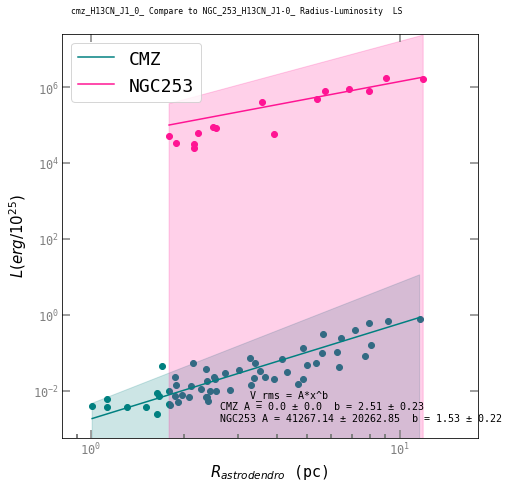

input data is of type linear fitting to powerlaw...
2.533431136416782 0.20346278619273186 2.2458997491321253 0.002200446276190057
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.421322374204151 0.07134539602567025
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.421322374204151, 0.015852746009347527] [0.07134539602567025, 0.0004463467579713737] 3.2483459949142452 0.007266195266807513
[[0.89883686 0.39952736]
 [1.17644694 0.33428747]
 [1.19286144 0.304399  ]
 ...
 [1.96791701 0.09749847]
 [1.95025446 0.09848012]
 [1.99725742 0.08497873]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J1-0_
    least sq  max like      MCMC
a   2.421322  3.248346  1.964313
a-  0.015853            0.026650
a+  0.015853            0.056488
c   0.071345  0.007266  0.099692
c-  0.000446            0.012933
c+  0.000446            0.010520



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.421322374204151 0.12590768844414357 310.93368238411017 3.3696129435264215 1.1785429004770342
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9643128539138337 0.1632479817848279 115.87913154346019 9.965480305120705 1.2580339975936887
Using Least Squares fit min r = 1

cmz_HCN_J1-0_ Compare to NGC_253_HCN_J1-0_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  0.07134539602567025  +-  0.021126920219742717 , b =  2.421322374204151  +-  0.12590768844414357

Structures plotted:  135

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.8855319046669567 197047.

mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J1-0_
    least sq  max like      MCMC
a   1.926462  2.153898  2.000000
a-  0.009934            0.000000
a+  0.009934            0.000000
c 532866.187132288842.201791 10.000000
c-17148238318.828630            0.000000
c+17148238318.828630            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9264616074310421 0.09967175913383475 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999756186 4.289438436194518e-06 999999998630.0221 999999.9979220589 9999999986.861624
NGC253 fit params and covariance error: a =  532866.1871324485  +-  130951.28223438146 , b =  1.9264616074310421  +-  0.09967175913383475

Structures plotted:  49



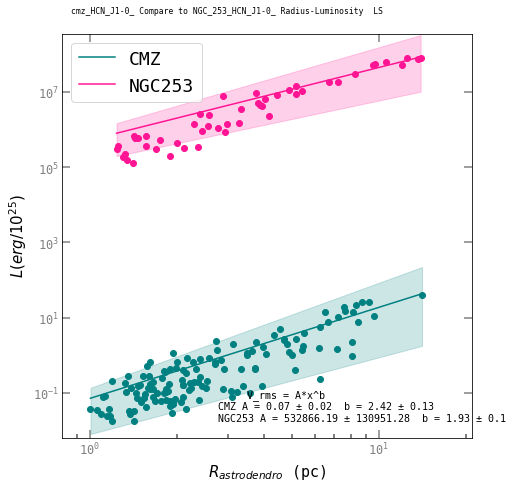

input data is of type linear fitting to powerlaw...
6.2773702492551795 0.03769614645834464 2.0382323662032324 0.09729476048125324
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.063938552075704 0.0017690076470348317
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.063938552075704, 0.029636640041620733] [0.0017690076470348317, 5.138087012036166e-07] 2.486504837123304 0.0005610224780270732
[[-0.13650752 -0.40188187]
 [-0.13650752 -0.40188187]
 [-0.13650752 -0.40188187]
 ...
 [-1.51710258 -0.12302502]
 [-1.29015067 -0.3389224 ]
 [-1.27322938 -0.18385222]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13COp_J1_0_
    least sq  max like      MCMC
a   2.063939  2.486505 -1.204216
a-  0.029637            0.969141
a+  0.029637            0.578355
c   0.001769  0.000561  0.025181
c-  0.000001            0.833255
c+  0.000001            0.799405



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.063938552075704 0.1721529553670826 116.33424073319236 2.8175790335863407 1.0040815977610433
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.2042155410851914 0.9844495430761222 0.06621631662224006 0.052674723678928545 1.0596942063212058
Using Least Squares fit min r = 1

cmz_H13COp_J1_0_ Compare to NGC_253_H13CO+_J1-0_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  0.0017690076470348317  +-  0.0007168045069638002 , b =  2.063938552075704  +-  0.1721529553670826

Structures plotted:  28

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.8384662312

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CO+_J1-0_
    least sq  max like      MCMC
a   1.740282  2.018763  2.000000
a-  0.026513            0.000000
a+  0.026513            0.000000
c 18226.3591569205.221410 10.000000
c-43749042.637147            0.000000
c+43749042.637147            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.7402815634199345 0.1628290844810065 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999979591885 3.925282650924347e-05 999999889780.1519 999999.8395776686 9999998944.792934
NGC253 fit params and covariance error: a =  18226.35915648564  +-  6614.305907436324 , b =  1.7402815634199345  +-  0.1628290844810065

Structures plotted:  20



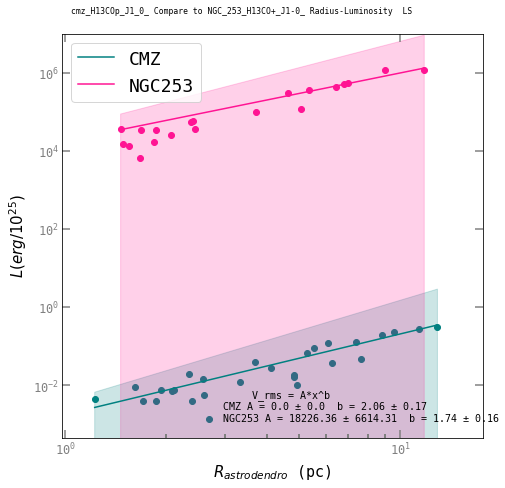

input data is of type linear fitting to powerlaw...
6.044004254266891 0.26197419274898814 1.0126452542938074 0.018879234146835122
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.0023658814627163 0.10691630778068358
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.0023658814627163, 0.02076172683109688] [0.10691630778068358, 0.0016298024734559171] 2.774265649432577 0.011958537690941547
[[1.65734371 0.09776135]
 [1.77769727 0.08070355]
 [1.77769727 0.08070355]
 ...
 [1.96674813 0.06340565]
 [1.97166259 0.06131622]
 [1.97166259 0.06131622]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_3mm_HCO+_J1-0_
    least sq  max like      MCMC
a   2.002366  2.774266  1.948789
a-  0.020762            0.038107
a+  0.020762            0.080609
c   0.106916  0.011959  0.076381
c-  0.001630            0.014713
c+  0.001630            0.011010



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.0023658814627163 0.14408930158445796 128.6122065281871 2.483405769124626 1.279134780315378
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9487894223733264 0.19520909446790652 105.96700850959694 9.263520245900464 1.192288216581114
Using Least Squares fit min r = 1

cmz_3mm_HCO+_J1-0_ Compare to NGC_253_HCO+_J1-0_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  0.10691630778068358  +-  0.04037081214758897 , b =  2.0023658814627163  +-  0.14408930158445796

Structures plotted:  44

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.301315579716439 

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J1-0_
    least sq  max like      MCMC
a   2.010035  2.177599  2.000000
a-  0.014394            0.000000
a+  0.014394            0.000000
c 376988.950894236300.688927 10.000000
c-11865942725.017820            0.000000
c+11865942725.017820            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.010035160391751 0.1199744580470007 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999828058 3.6098658879846648e-06 999999999039.0966 999999.9985460641 9999999990.786877
NGC253 fit params and covariance error: a =  376988.95089422463  +-  108930.90803356879 , b =  2.010035160391751  +-  0.1199744580470007

Structures plotted:  55



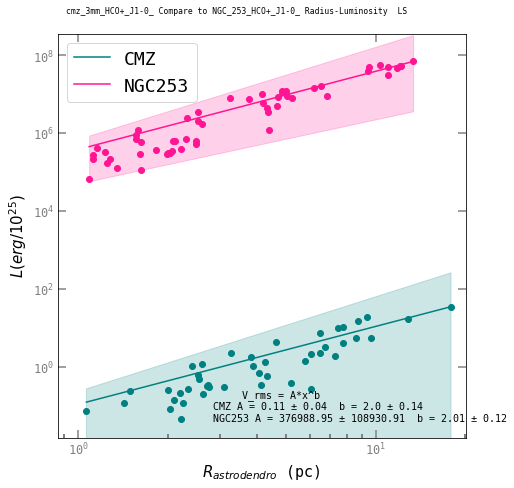

input data is of type linear fitting to powerlaw...
2.9330338868678623 0.12113085829770284 0.945502247687858 0.038324690254256805
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.2115634596673015 0.17058384654139408
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.2115634596673015, 0.009903795057014508] [0.17058384654139408, 0.001898030395420027] 2.925335772206989 0.012095822791897113
[[1.61851178 0.21092867]
 [1.61851178 0.21092867]
 [1.61851178 0.21092867]
 ...
 [1.99988348 0.10670544]
 [1.99939114 0.10623844]
 [1.99939114 0.10623844]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J3_2__
    least sq  max like      MCMC
a   2.211563  2.925336  1.999048
a-  0.009904            0.000711
a+  0.009904            0.001590
c   0.170584  0.012096  0.104670
c-  0.001898            0.001501
c+  0.001898            0.001501



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.2115634596673015 0.09951781276241208 241.07229712941037 2.365911950007247 1.4810981741025386
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9990477139914071 0.026669411135857607 126.97479851672733 11.228284228665242 1.272535241138927
Using Least Squares fit min r = 0.8

cmz_CO_J3_2__ Compare to NGC_253_CO_J3-2_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  0.17058384654139408  +-  0.04356639066321683 , b =  2.2115634596673015  +-  0.09951781276241208

Structures plotted:  1206

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.307427481621509 4889

mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J3-2_
    least sq  max like      MCMC
a   3.105308  4.977744  2.000000
a-  0.014082            0.000000
a+  0.014082            0.000000
c 40687.866463250.695746 10.000000
c-147152102.812221            0.000000
c+147152102.812221            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 3.105307740089518 0.11866625867421578 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999967266 1.5458473528143672e-06 999999999806.0676 999999.9997686082 9999999998.13605
NGC253 fit params and covariance error: a =  40687.866463366554  +-  12130.62664548789 , b =  3.105307740089518  +-  0.11866625867421578

Structures plotted:  583



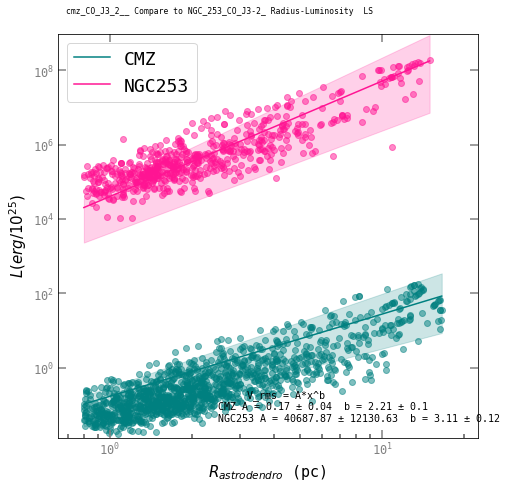

input data is of type linear fitting to powerlaw...
20.604951372863326 0.05375332506915114 2.8660503902850616 0.3946986262566051
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.910947820772235 0.00018422401834878983
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.910947820772235, 0.07670133135708054] [0.00018422401834878983, 4.643397542983116e-08] 2.093584119310262 0.0005019324678981024
[[-1.89509483e+00  6.84335860e+00]
 [-1.89509483e+00  6.84335860e+00]
 [-1.89509483e+00  6.84335860e+00]
 ...
 [ 1.63156882e+00  3.39725112e-03]
 [ 1.62726399e+00  3.45535525e-03]
 [ 1.57203509e+00  3.90354265e-03]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J1_0_
    least sq  max like      MCMC
a   2.910948  2.093584  1.581457
a-  0.076701            0.263445
a+  0.076701            0.673075
c   0.000184  0.000502  0.003172
c-  0.000000            0.013478
c+  0.000000            0.001983



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.910947820772235 0.2769500520979921 814.9520279293436 11.997073454708126 1.0004242814603492
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.5814573742155411 0.5132693271407711 38.42632858175989 2.849610478826926 1.0073294193907938
Using Least Squares fit min r = 9.5

cmz_CO_J1_0_ Compare to NGC_253_CO_J1-0_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  0.00018422401834878983  +-  0.000215485441340781 , b =  2.910947820772235  +-  0.2769500520979921

Structures plotted:  177

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
16.209780843308277 18296.701

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J1-0_
    least sq  max like      MCMC
a   1.864210  2.953718  2.000000
a-  0.003399            0.000000
a+  0.003399            0.000000
c 15381.587236 79.115182 10.000000
c-18696994.543280            0.000000
c+18696994.543280            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.864210432054973 0.05830142309575903 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999999156 2.5331974029541016e-07 999999999990.7909 999999.999984713 9999999999.909851
NGC253 fit params and covariance error: a =  15381.587236296076  +-  4324.002144227056 , b =  1.864210432054973  +-  0.05830142309575903

Structures plotted:  180



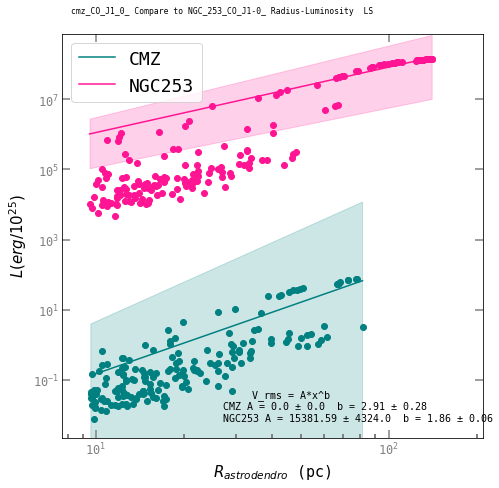

input data is of type linear fitting to powerlaw...
2.456587764360523 0.006707478282490697 1.2577741157489633 0.09218498776152229
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.974086289999607 0.0007285743964855202
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.974086289999607, 0.08807133422034723] [0.0007285743964855202, 1.911344675596944e-07] 2.785078087053523 0.0010261507627810549
[[-1.47923667 -1.32348925]
 [-1.46229935 -1.8787004 ]
 [-1.39016746 -1.71438585]
 ...
 [-1.67471354 -0.14335169]
 [-1.12358172  0.06386426]
 [-0.80580436  0.02532132]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_SiO_J2_1_
    least sq  max like      MCMC
a   2.974086  2.785078 -1.096725
a-  0.088071            1.087984
a+  0.088071            0.655530
c   0.000729  0.001026  0.028531
c-  0.000000            0.593504
c+  0.000000            0.576186



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.974086289999607 0.2967681489316992 943.6585178870503 13.833515606361368 1.001679012510215
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.0967254755855644 1.0430647504479995 0.0854682990833575 0.07080176834720907 1.0678998774562527
Using Least Squares fit min r = 1

cmz_SiO_J2_1_ Compare to NGC_253_SiO_J2-1_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  0.0007285743964855202  +-  0.00043718928115828095 , b =  2.974086289999607  +-  0.2967681489316992

Structures plotted:  28

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
5.275117448317318 367353

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_SiO_J2-1_
    least sq  max like      MCMC
a   2.485784  2.774063  2.000000
a-  0.046021            0.000000
a+  0.046021            0.000000
c 4717.9311292566.650777 10.000000
c-4130743.622061            0.000000
c+4130743.622061            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.4857838351212225 0.21452534015662145 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999945679292 6.402499582568805e-05 999999753388.3284 999999.6337047903 9999997658.961306
NGC253 fit params and covariance error: a =  4717.931128516302  +-  2032.42309130286 , b =  2.4857838351212225  +-  0.21452534015662145

Structures plotted:  13



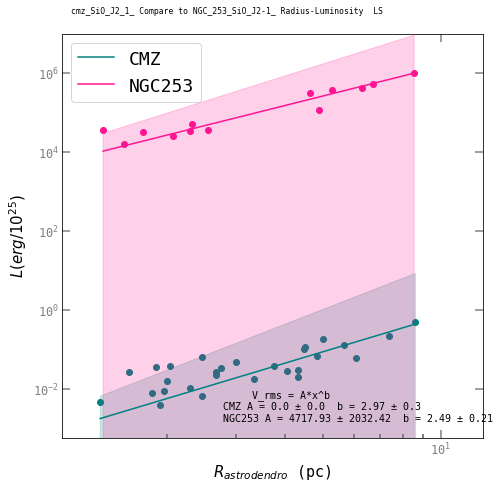

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_H13CN_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 0.007044160191293011 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.509747066951114 0.0018268326196979406
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.509747066951114, 0.05108414531240315] [0.0018268326196979406, 8.468051848562569e-07] 2.928173846497019 0.0006380382915226768
[[ 0.85693242  0.16085031]
 [-0.03799824  0.24446171]
 [ 0.01810183  0.06259014]
 ...
 [-1.63052909  0.07916683]
 [-1.82981313  0.08070258]
 [-1.82891601  0.08601878]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   2.509747  2.928174 -1.039389
a-  0.051084            1.108411
a+  0.051084            0.682819
c   0.001827  0.000638  0.028484
c-  0.000001            0.395873
c+  0.000001            0.369222



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.509747066951114 0.2260180198842631 324.7685000905797 6.180702785605836 1.0042152970338967
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.039389308284981 1.0528110944043043 0.09752027255020664 0.09300935912325183 1.0677859809360626
Using Least Squares fit min r = 1

NOT AVAILABLE Compare to NGC_253_H13CN_J4-3_ Radius-Luminosity  LS

NGC_253_H13CN_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.7769403699430149 158126.27226426805 6.969209033683409 0.017490196169355682
masking bad values ...
restricting fit to [None, None] ...
least

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J4-3_
    least sq  max like      MCMC
a   1.462257  2.692540  2.000000
a-  0.831824            0.000000
a+  0.831824            0.000000
c 121794.61207823954.543403  9.999999
c-12426803850.142380            0.000001
c+12426803850.142380            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.4622565904606057 0.9120438831582988 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999213713424 0.00024359604475561147 999998043931.4921 999997.1815805346 9999982249.803291
NGC253 fit params and covariance error: a =  121794.61207756092  +-  111475.57512810768 , b =  1.4622565904606057  +-  0.9120438831582988

Structures plotted:  11



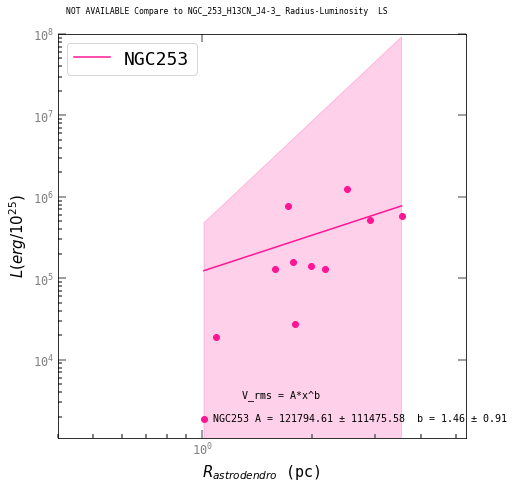

input data is of type linear fitting to powerlaw...
2.127798493004818 0.024375816763323902 2.108629364314519 0.01725345592894409
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.1168371201842793 0.06172925992465936
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.1168371201842793, 0.006552517698208973] [0.06172925992465936, 0.00011953065215507559] 2.7656976646461295 0.013392336834195395
[[-0.67461     0.37418353]
 [ 0.19762942  0.27770564]
 [ 0.15588612  0.28312437]
 ...
 [ 1.87628325  0.07956927]
 [ 1.80682514  0.08848252]
 [ 1.80682514  0.08848252]]
plotting walkers ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J4_3_
    least sq  max like      MCMC
a   2.116837  2.765698  1.796927
a-  0.006553            0.145910
a+  0.006553            0.265690
c   0.061729  0.013392  0.084618
c-  0.000120            0.042486
c+  0.000120            0.024273



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.1168371201842793 0.08094762317825628 150.85731720675813 1.5087985554488317 1.1527344167690359
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.796927162888442 0.3819819516879257 76.1281263987743 6.248722338471913 1.2151166689401272
Using Least Squares fit min r = 1

cmz_HCN_J4_3_ Compare to NGC_253_HCN_J4-3_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  0.06172925992465936  +-  0.010933007461585105 , b =  2.1168371201842793  +-  0.08094762317825628

Structures plotted:  145

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.296472346657536 16641.307

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J4-3_
    least sq  max like      MCMC
a   2.294983  2.407829  2.000000
a-  0.022149            0.000000
a+  0.022149            0.000000
c 99118.55055774333.285011 10.000000
c-1193306929.106646            0.000000
c+1193306929.106646            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.294983217008476 0.1488250201979001 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999998592033 1.0321063167162058e-05 999999992681.2495 999999.9889746936 9999999930.054459
NGC253 fit params and covariance error: a =  99118.55055689861  +-  34544.2749107091 , b =  2.294983217008476  +-  0.1488250201979001

Structures plotted:  42



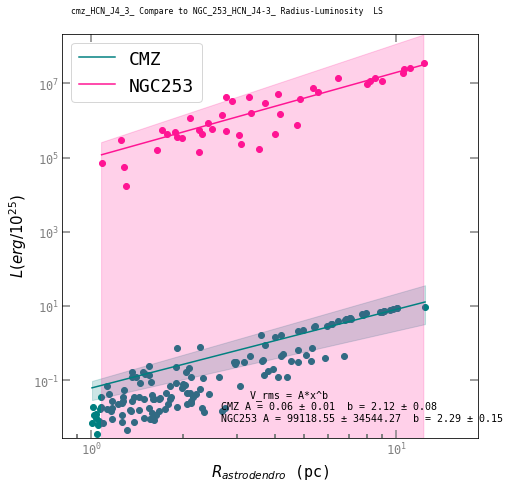

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_HCO+_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 0.007044160191293011 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.509747066951114 0.0018268326196979406
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.509747066951114, 0.05108414531240315] [0.0018268326196979406, 8.468051848562569e-07] 2.928173846497019 0.0006380382915226768
[[-0.07383957  0.12505273]
 [-0.07383957  0.12505273]
 [-0.11846573  0.11787216]
 ...
 [-0.7384762  -0.16299725]
 [-0.35622434 -0.22757413]
 [-0.35622434 -0.22757413]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   2.509747  2.928174 -0.998292
a-  0.051084            1.132714
a+  0.051084            0.726346
c   0.001827  0.000638  0.017191
c-  0.000001            0.379906
c+  0.000001            0.370326



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.509747066951114 0.2260180198842631 324.7685000905797 6.180702785605836 1.0042152970338967
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -0.9982921712724915 1.064290150224301 0.10444762413956157 0.09143518988394157 1.0403769864026617
Using Least Squares fit min r = 0.9

NOT AVAILABLE Compare to NGC_253_HCO+_J4-3_ Radius-Luminosity  LS

NGC_253_HCO+_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.0967037285160233 100584.05233236663 3.579715938591389 0.05177202887285892
masking bad values ...
restricting fit to [None, None] ...
least 

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J4-3_
    least sq  max like      MCMC
a   2.338101  2.363408  2.000000
a-  0.031706            0.000000
a+  0.031706            0.000000
c 96730.73952086797.882353 10.000000
c-1603808546.712888            0.000000
c+1603808546.712888            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.33810085550275 0.17806041365314762 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999999896251 8.866466389712001e-06 999999994771.9043 999999.9919484806 9999999950.107952
NGC253 fit params and covariance error: a =  96730.73951975885  +-  40047.578537445785 , b =  2.33810085550275  +-  0.17806041365314762

Structures plotted:  43



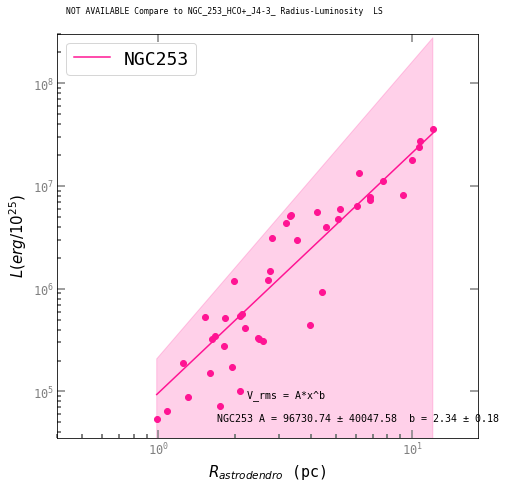

In [9]:
# Make plots:

CMZ_names = File_Descriptors_cmz#[5]
NGC_names = File_Descriptors_NGC#[5]
MCMC=False
ls=True
use_manual_error_v=True
use_manual_error_r=True
fit_results_cmz = [[],[]]
fit_results_ngc = [[],[]]
'''
    "NGC_253_H13CN_J1-0_",
    "NGC_253_HCN_J1-0_",
    "NGC_253_H13CO+_J1-0_",
    "NGC_253_HCO+_J1-0_",
    "NGC_253_CO_J3-2_",
    "NGC_253_CO_J1-0_",
    "NGC_253_SiO_J2-1_",
    "NGC_253_H13CN_J4-3_",
    "NGC_253_HCN_J4-3_",
    "NGC_253_HCO+_J4-3_"
'''
min_rs = [1,1,1,1,.8,9.5,1,1,1,.9] #pc CO 10 should be 32? CO 32 should be .8 or 1?
max_rs = [9999,9999,9999,9999,9999,9999,99999,9999,9999,99999]
#manual errors:
r_errs=[.1,.1,.1,.1,.1,1,.1,.1,.1,.1] #pc 1/5 of the beam
v_errs=[.5,.5,.5,.5,.5,1,.5,.5,.5,.5,] # i didnt calculate L errors
############################################################


#make a meta function for doing the plots of leaves and branches and stuff
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="All",save_name="LS",fs=8,plot_errors=False,ls=14,figsize=(8,8))

['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_'] ['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_0_', 'cmz_3mm_HCO+_J1-0_', 'cmz_CO_J3_2__', 'cmz_CO_J1_0_', 'cmz_SiO_J2_1_', 'NOT AVAILABLE', 'cmz_HCN_J4_3_', 'NOT AVAILABLE']
input data is of type linear fitting to powerlaw...
2.3772124338612706 0.007044160191293011 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.6668935991930889 0.003601653010759652
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.6668935991930889, 0.06510632219268035] [0.003601653010759652, 1.7214746675055438e-06] 1.8390544080354028 0.002811125599762872
[[ 0.30543449  0.04383118]
 [ 0.50432561 -0.05422235]
 [-0.24744971  0.15833591]
 ...
 [-1.823

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13CN_J1_0_
    least sq  max like      MCMC
a   1.666894  1.839054 -0.966699
a-  0.065106            1.186547
a+  0.065106            0.739670
c   0.003602  0.002811  0.010037
c-  0.000002            0.374030
c+  0.000002            0.381564



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.6668935991930889 0.25515940545604104 46.82688321349171 2.64951908435103 1.0083275956486586
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -0.9666989607864074 1.0892872843634247 0.11049375756151483 0.09142221080002491 1.0233794778168561
Using Least Squares fit min r = 1

cmz_H13CN_J1_0_ Compare to NGC_253_H13CN_J1-0_ Radius-Luminosity  LeavesMCMC

CMZ fit params and covariance error: a =  0.003601653010759652  +-  0.0013120497961226715 , b =  1.6668935991930889  +-  0.25515940545604104

Structures plotted:  42

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.227963

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J1-0_
    least sq  max like      MCMC
a   1.780688  2.093133  2.000000
a-  0.086356            0.000000
a+  0.086356            0.000000
c 19954.10477510855.151439 10.000000
c-124873569.537631            0.000000
c+124873569.537631            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.780688315775465 0.2938635758334471 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999717549177 0.0001453310342907206 999998914995.7766 999998.3905604815 9999989800.324137
NGC253 fit params and covariance error: a =  19954.104775152042  +-  11174.684314898142 , b =  1.780688315775465  +-  0.2938635758334471

Structures plotted:  11



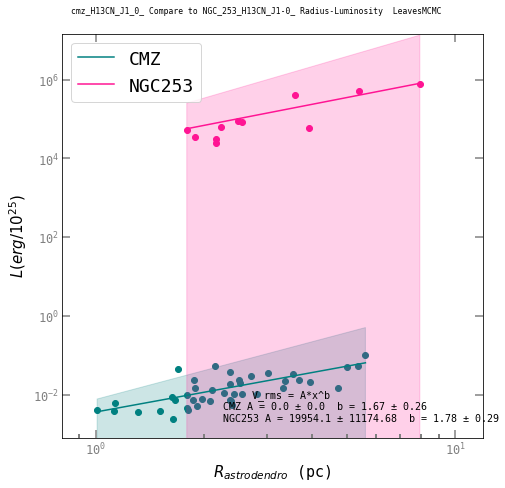

input data is of type linear fitting to powerlaw...
2.533431136416782 0.20346278619273186 2.2458997491321253 0.002200446276190057
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.4087161538814066 0.11710373335430052
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.4087161538814066, 0.05882280521196938] [0.11710373335430052, 0.001326135428886161] 2.2287275928435832 0.03335312877334929
[[0.52578473 0.35922165]
 [1.13164766 0.21873904]
 [1.13164766 0.21873904]
 ...
 [1.28818702 0.09765465]
 [1.28818702 0.09765465]
 [1.28818702 0.09765465]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J1-0_
    least sq  max like      MCMC
a   1.408716  2.228728  0.048472
a-  0.058823            1.236085
a+  0.058823            1.410041
c   0.117104  0.033353  0.133679
c-  0.001326            0.174802
c+  0.001326            0.094083



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.4087161538814066 0.2425341320556127 33.559840434116914 2.1322878058831045 1.3094946648327848
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.0484719898680992 1.1117937914163742 1.5210762728585325 0.2182796437949321 1.3604387761589394
Using Least Squares fit min r = 1

cmz_HCN_J1-0_ Compare to NGC_253_HCN_J1-0_ Radius-Luminosity  LeavesMCMC

CMZ fit params and covariance error: a =  0.11710373335430052  +-  0.03641614242181839 , b =  1.4087161538814066  +-  0.2425341320556127

Structures plotted:  104

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.8855319046669567

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J1-0_
    least sq  max like      MCMC
a   2.450752  2.678727  2.000000
a-  0.086906            0.000000
a+  0.086906            0.000000
c 176892.353926123126.322892 10.000000
c-6097213997.165980            0.000000
c+6097213997.165980            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.4507520770332185 0.29479781104898967 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999986420045 3.214748625374842e-05 999999957974.2119 999999.9383924785 9999999611.01112
NGC253 fit params and covariance error: a =  176892.35392640418  +-  78084.65916661211 , b =  2.4507520770332185  +-  0.29479781104898967

Structures plotted:  29



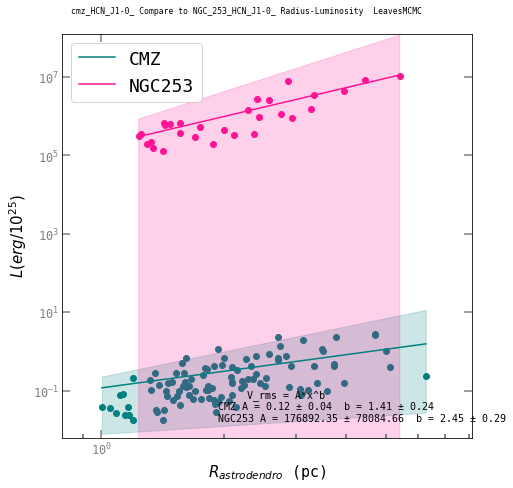

input data is of type linear fitting to powerlaw...
6.2773702492551795 0.03769614645834464 2.0382323662032324 0.09729476048125324
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.5166692205862233 0.002681369037027154
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.5166692205862233, 0.18220607508169367] [0.002681369037027154, 4.015356645050816e-06] 1.6680336974657302 0.0017195660514860611
[[-1.88709813  1.8064648 ]
 [-1.90285331  2.0661744 ]
 [-1.86070814  1.06064219]
 ...
 [-1.27941587 -0.22515234]
 [-1.32872387 -0.71731402]
 [-1.28321335 -0.60869397]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13COp_J1_0_
    least sq  max like      MCMC
a   1.516669  1.668034 -1.170455
a-  0.182206            1.026832
a+  0.182206            0.599494
c   0.002681  0.001720  0.012789
c-  0.000004            0.817404
c+  0.000004            0.813011



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.5166692205862233 0.42685603554558493 33.06363436340669 3.724470731388044 1.0061931792935612
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.1704549426654332 1.0133270644202936 0.06955589533370446 0.0518697627632241 1.029885367915226
Using Least Squares fit min r = 1

cmz_H13COp_J1_0_ Compare to NGC_253_H13CO+_J1-0_ Radius-Luminosity  LeavesMCMC

CMZ fit params and covariance error: a =  0.002681369037027154  +-  0.002003835483529228 , b =  1.5166692205862233  +-  0.42685603554558493

Structures plotted:  19

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.83846

mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CO+_J1-0_
    least sq  max like      MCMC
a   2.497542  2.576903  2.000000
a-  0.016080            0.000000
a+  0.016080            0.000000
c 5582.1056704878.847056  9.999999
c-1320773.753629            0.000000
c+1320773.753629            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.4975420670815773 0.12680847307600857 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999954664669 0.00018570727979112312 999998405668.6816 999997.7313790919 9999985100.56978
NGC253 fit params and covariance error: a =  5582.1056700145255  +-  1149.2492130208102 , b =  2.4975420670815773  +-  0.12680847307600857

Structures plotted:  12



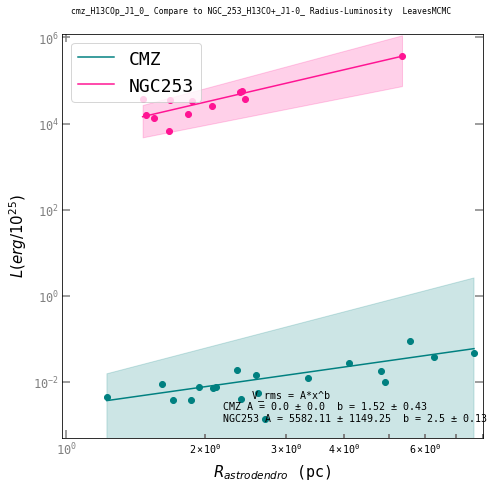

input data is of type linear fitting to powerlaw...
6.044004254266891 0.26197419274898814 1.0126452542938074 0.018879234146835122
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.550660298358861 0.019711702995524324
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.550660298358861, 0.13687213253221042] [0.019711702995524324, 0.00020384849380341872] 4.0193470404455915 0.0008925512914512655
[[ 0.03719511  0.45002873]
 [ 0.02897114  0.45204472]
 [-0.07346371  0.47427344]
 ...
 [ 0.6504359   0.2238024 ]
 [ 0.6504359   0.2238024 ]
 [ 0.6504359   0.2238024 ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_3mm_HCO+_J1-0_
    least sq  max like      MCMC
a   2.550660  4.019347  0.209444
a-  0.136872            1.089742
a+  0.136872            1.408755
c   0.019712  0.000893  0.280845
c-  0.000204            0.588367
c+  0.000204            0.212102



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.550660298358861 0.3699623393430883 371.8536094236325 10.825590693769856 1.0464336650651482
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.20944407572007157 1.0439071959313218 3.092355468514128 0.2720920747516323 1.9091732243117332
Using Least Squares fit min r = 1

cmz_3mm_HCO+_J1-0_ Compare to NGC_253_HCO+_J1-0_ Radius-Luminosity  LeavesMCMC

CMZ fit params and covariance error: a =  0.019711702995524324  +-  0.014277552094228853 , b =  2.550660298358861  +-  0.3699623393430883

Structures plotted:  31

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.3013155

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J1-0_
    least sq  max like      MCMC
a   2.022779  2.318247  2.000000
a-  0.122352            0.000000
a+  0.122352            0.000000
c 269047.348664149273.215425 10.000000
c-17762609479.736881            0.000000
c+17762609479.736881            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.0227792245630676 0.34978824488458005 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999990584902 2.6785996775736846e-05 999999970828.2761 999999.9569825334 9999999729.961824
NGC253 fit params and covariance error: a =  269047.3486640659  +-  133276.44007752038 , b =  2.0227792245630676  +-  0.34978824488458005

Structures plotted:  34



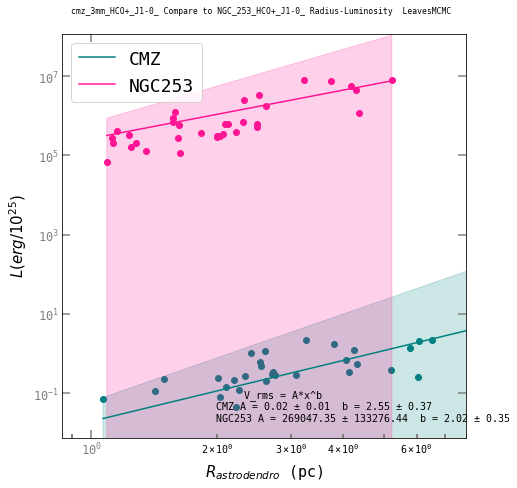

input data is of type linear fitting to powerlaw...
2.9330338868678623 0.12113085829770284 0.945502247687858 0.038324690254256805
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.9853304758445997 0.18178532104224435
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.9853304758445997, 0.007407449407987243] [0.18178532104224435, 0.0003717174517189634] 1.1005158925431757 0.10777432002763206
[[0.90273596 0.11202689]
 [0.90273596 0.11202689]
 [0.90273596 0.11202689]
 ...
 [0.9110485  0.13558251]
 [0.81646873 0.14554603]
 [0.88073422 0.13234054]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J3_2__
    least sq  max like      MCMC
a   0.985330  1.100516  1.065777
a-  0.007407            0.169891
a+  0.007407            0.169867
c   0.181785  0.107774  0.111298
c-  0.000372            0.026047
c+  0.000372            0.023921



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.9853304758445997 0.08606654058336052 14.693179928871826 0.5009255170496599 1.5197960836376863
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.065777077457718 0.4121778604607491 15.03403031685085 3.1020135055758993 1.2921065981911901
Using Least Squares fit min r = 0.8

cmz_CO_J3_2__ Compare to NGC_253_CO_J3-2_ Radius-Luminosity  LeavesMCMC

CMZ fit params and covariance error: a =  0.18178532104224435  +-  0.019279975407633782 , b =  0.9853304758445997  +-  0.08606654058336052

Structures plotted:  881

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.30742748162150

mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J3-2_
    least sq  max like      MCMC
a   1.138983  1.047156  2.000000
a-  0.008197            0.000000
a+  0.008197            0.000000
c 272800.330690173123.937503 10.000000
c-1004664289.905613            0.000000
c+1004664289.905613            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.1389834578783915 0.09053850653024689 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999018763 8.613670330194876e-06 999999996752.8097 999999.9950561923 9999999969.78748
NGC253 fit params and covariance error: a =  272800.3306900339  +-  31696.439703941716 , b =  1.1389834578783915  +-  0.09053850653024689

Structures plotted:  464



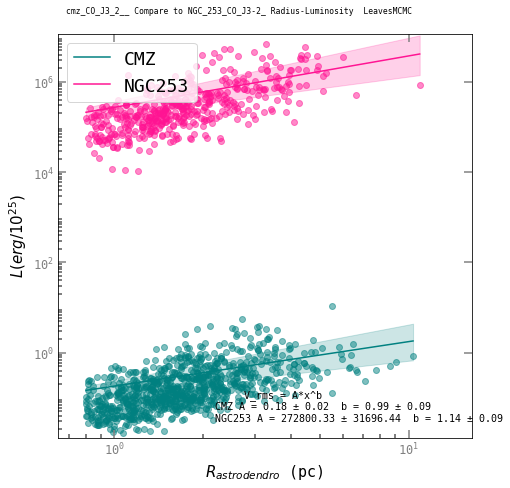

input data is of type linear fitting to powerlaw...
20.604951372863326 0.05375332506915114 2.8660503902850616 0.3946986262566051
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.5684168910420824 0.0025924515504306645
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.5684168910420824, 0.17318134294521628] [0.0025924515504306645, 1.0727008511926502e-05] 2.5799077488441235 9.039474134332363e-05
[[-1.87226605  5.74153978]
 [-1.66064828  1.84229787]
 [-1.66064828  1.84229787]
 ...
 [-1.37924474  1.59417347]
 [-1.37244181  1.87633758]
 [-1.29188699  2.23598698]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J1_0_
    least sq  max like      MCMC
a   1.568417  2.579908 -1.614202
a-  0.173181            0.515675
a+  0.173181            0.272150
c   0.002592  0.000090  1.520336
c-  0.000011            4.612360
c+  0.000011            2.998666



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.5684168910420824 0.4161506253091737 37.23997172736661 3.853568360791817 1.005987192310014
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.614201677855447 0.7181052483661223 0.8056272291577871 0.020780648750158837 33.13872646145653
Using Least Squares fit min r = 9.5

cmz_CO_J1_0_ Compare to NGC_253_CO_J1-0_ Radius-Luminosity  LeavesMCMC

CMZ fit params and covariance error: a =  0.0025924515504306645  +-  0.0032752112163838385 , b =  1.5684168910420824  +-  0.4161506253091737

Structures plotted:  112

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
16.20978084330827

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J1-0_
    least sq  max like      MCMC
a   1.398064  2.225944  2.000000
a-  0.634112            0.000000
a+  0.634112            0.000000
c 3174.396947111.356039 10.000000
c-66100750.621208            0.000000
c+66100750.621208            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.3980636219398674 0.7963116846147477 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999999973105 4.50626488453619e-06 999999997898.9905 999999.9968112772 9999999979.609184
NGC253 fit params and covariance error: a =  3174.3969469665703  +-  8130.236812123501 , b =  1.3980636219398674  +-  0.7963116846147477

Structures plotted:  101



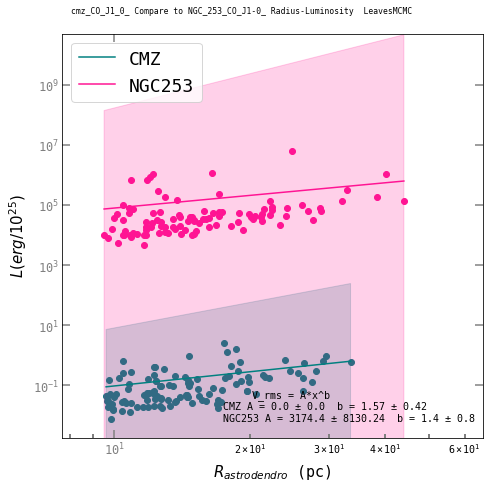

input data is of type linear fitting to powerlaw...
2.456587764360523 0.006707478282490697 1.2577741157489633 0.09218498776152229
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.4459591619890977 0.0061777152829415784
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.4459591619890977, 0.12476469940796875] [0.0061777152829415784, 1.07684103719343e-05] 1.9791230872571381 0.0028150141155881257
[[-1.55802328  0.88010626]
 [-1.3683575   0.58974831]
 [-1.34627366  0.58643605]
 ...
 [-0.5528784   0.0200117 ]
 [-0.79483862  0.04465432]
 [-1.12006066 -0.23751613]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_SiO_J2_1_
    least sq  max like      MCMC
a   1.445959  1.979123 -1.091589
a-  0.124765            1.121955
a+  0.124765            0.660099
c   0.006178  0.002815  0.023998
c-  0.000011            0.601179
c+  0.000011            0.579643



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.4459591619890977 0.3532204685574843 28.32284510689399 2.852476965715577 1.0143263678009615
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.091589304024846 1.0592239270277866 0.08558712015089896 0.07019936150340665 1.0568119548121837
Using Least Squares fit min r = 1

cmz_SiO_J2_1_ Compare to NGC_253_SiO_J2-1_ Radius-Luminosity  LeavesMCMC

CMZ fit params and covariance error: a =  0.0061777152829415784  +-  0.003281525616528736 , b =  1.4459591619890977  +-  0.3532204685574843

Structures plotted:  23

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
5.27511744831731

mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_SiO_J2-1_
    least sq  max like      MCMC
a   2.540818  2.644453  2.000000
a-  0.060864            0.000000
a+  0.060864            0.000000
c 5665.7248594665.305726  9.999999
c-4965310.666934            0.000000
c+4965310.666934            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.54081832454822 0.24670591300549455 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999629600154 0.0001672724332639889 999998678633.2137 999998.0771051553 9999987639.208212
NGC253 fit params and covariance error: a =  5665.724859028885  +-  2228.2977060828466 , b =  2.54081832454822  +-  0.24670591300549455

Structures plotted:  9



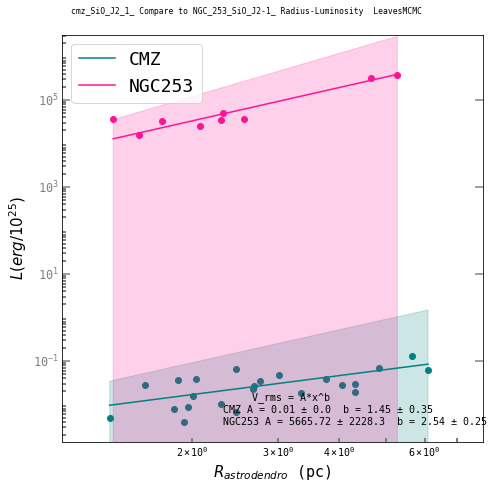

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_H13CN_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 0.007044160191293011 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.6668935991930889 0.003601653010759652
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.6668935991930889, 0.06510632219268035] [0.003601653010759652, 1.7214746675055438e-06] 1.8390544080354028 0.002811125599762872
[[ 0.31193047 -0.14603766]
 [-0.64578357  0.0655532 ]
 [-0.3652444  -0.14067001]
 ...
 [-1.17296635  0.60451641]
 [-1.16756943  0.80301184]
 [-1.16756943  0.80301184]]
plotting walkers ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   1.666894  1.839054 -0.976133
a-  0.065106            1.189748
a+  0.065106            0.741801
c   0.003602  0.002811  0.016681
c-  0.000002            0.374876
c+  0.000002            0.370324



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.6668935991930889 0.25515940545604104 46.82688321349171 2.64951908435103 1.0083275956486586
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -0.976133493062691 1.0907557688743312 0.1097861534796619 0.0920897473000051 1.0391567482765367
Using Least Squares fit min r = 1

NOT AVAILABLE Compare to NGC_253_H13CN_J4-3_ Radius-Luminosity  LeavesMCMC

NGC_253_H13CN_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.7769403699430149 158126.27226426805 6.969209033683409 0.017490196169355682
masking bad values ...
restricting fit to [None, None] ..

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J4-3_
    least sq  max like      MCMC
a   1.803737  3.460309  2.000000
a-  1.883035            0.000000
a+  1.883035            0.000000
c 70783.79968913282.752634  9.999998
c-6822184438.072453            0.000001
c+6822184438.072453            0.000003



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.8037369422966414 1.3722371969803704 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999997963598493 0.00039305080372887397 999995929152.9084 999994.0492710784 9999963980.49885
NGC253 fit params and covariance error: a =  70783.79968906353  +-  82596.51589548105 , b =  1.8037369422966414  +-  1.3722371969803704

Structures plotted:  9



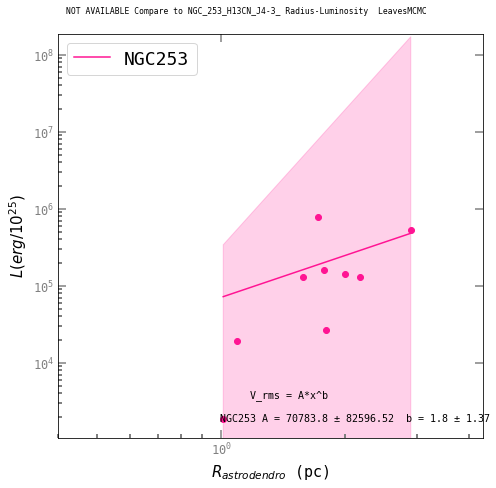

input data is of type linear fitting to powerlaw...
2.127798493004818 0.024375816763323902 2.108629364314519 0.01725345592894409
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.0876178791015403 0.019094606030785978
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.0876178791015403, 0.7404523586239756] [0.019094606030785978, 0.00012531115131456366] 1.8632050510548845 0.01617429381942651
[[-0.18069429  0.15180024]
 [-0.21024788  0.17596817]
 [-0.21024788  0.17596817]
 ...
 [-0.71400109 -0.02229886]
 [-1.14265265 -0.0560965 ]
 [-1.36067832  0.10497691]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J4_3_
    least sq  max like      MCMC
a   2.087618  1.863205 -0.624312
a-  0.740452            1.435310
a+  0.740452            0.984022
c   0.019095  0.016174  0.027487
c-  0.000125            0.180684
c+  0.000125            0.175244



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.0876178791015403 0.8604954146443639 127.8534598919284 14.764292836597313 1.044947824229276
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -0.6243123871804799 1.1980440319837296 0.2530316140774477 0.1324201950749563 1.065337398252701
Using Least Squares fit min r = 1

cmz_HCN_J4_3_ Compare to NGC_253_HCN_J4-3_ Radius-Luminosity  LeavesMCMC

CMZ fit params and covariance error: a =  0.019094606030785978  +-  0.011194246348663391 , b =  2.0876178791015403  +-  0.8604954146443639

Structures plotted:  75

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.296472346657536 1

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J4-3_
    least sq  max like      MCMC
a   1.295770  2.242693  2.000000
a-  0.378230            0.000000
a+  0.378230            0.000000
c 296510.22612164819.530364 10.000000
c-53398766003.917931            0.000000
c+53398766003.917931            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.295769826943182 0.6150040785070663 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999959875923 5.503020415959703e-05 999999881797.0593 999999.8263495973 9999998910.359686
NGC253 fit params and covariance error: a =  296510.226121415  +-  231081.73013874967 , b =  1.295769826943182  +-  0.6150040785070663

Structures plotted:  26



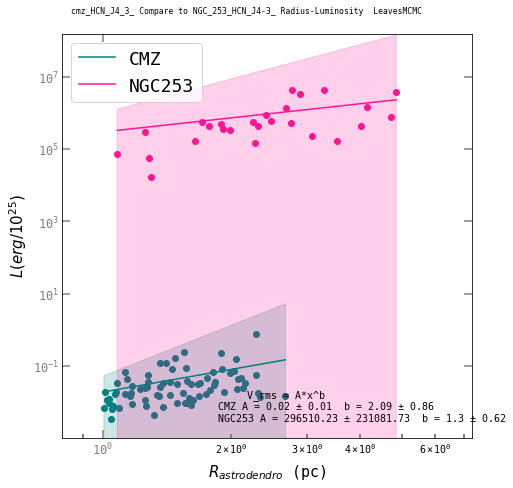

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_HCO+_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 0.007044160191293011 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.6668935991930889 0.003601653010759652
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.6668935991930889, 0.06510632219268035] [0.003601653010759652, 1.7214746675055438e-06] 1.8390544080354028 0.002811125599762872
[[-1.52714738 -0.98413194]
 [-1.40662507 -0.93551509]
 [-1.55718137 -1.19234686]
 ...
 [-0.91306648 -0.09168535]
 [-0.77998371 -0.21076912]
 [ 0.24715022  0.0267169 ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   1.666894  1.839054 -0.960752
a-  0.065106            1.186297
a+  0.065106            0.749133
c   0.003602  0.002811  0.013039
c-  0.000002            0.384827
c+  0.000002            0.369306



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.6668935991930889 0.25515940545604104 46.82688321349171 2.64951908435103 1.0083275956486586
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -0.9607524132027732 1.0891727915671907 0.11279406773382902 0.09266675861484241 1.030477876471213
Using Least Squares fit min r = 0.9

NOT AVAILABLE Compare to NGC_253_HCO+_J4-3_ Radius-Luminosity  LeavesMCMC

NGC_253_HCO+_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.0967037285160233 100584.05233236663 3.579715938591389 0.05177202887285892
masking bad values ...
restricting fit to [None, None] .

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J4-3_
    least sq  max like      MCMC
a   1.505879  1.940701  2.000000
a-  0.042095            0.000000
a+  0.042095            0.000000
c 291310.136372112079.217409 10.000000
c-12970052477.726274            0.000000
c+12970052477.726274            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.5058787095784205 0.2051700997904868 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999985965722 3.2516723832553186e-05 999999945112.6115 999999.917743741 9999999483.441233
NGC253 fit params and covariance error: a =  291310.13637152483  +-  113886.1382158789 , b =  1.5058787095784205  +-  0.2051700997904868

Structures plotted:  27



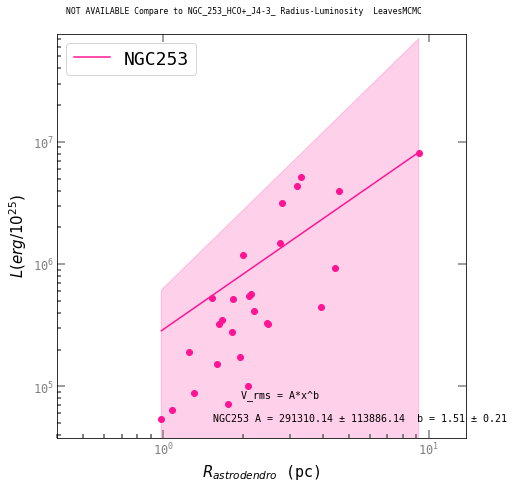

In [10]:
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="Leaves",save_name="MCMC",fs=8,plot_errors=False)

['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_'] ['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_0_', 'cmz_3mm_HCO+_J1-0_', 'cmz_CO_J3_2__', 'cmz_CO_J1_0_', 'cmz_SiO_J2_1_', 'NOT AVAILABLE', 'cmz_HCN_J4_3_', 'NOT AVAILABLE']
input data is of type linear fitting to powerlaw...
7.724598111313055 0.08322325129661186 4.748336844220261 0.025805452356985528
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.3078822142579924 0.00292768311923492
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.3078822142579924, 0.2373293631524872] [0.00292768311923492, 1.0133161614990141e-05] 2.834063625996427 0.0007986423120984929
[[ 0.92317631  0.07459241]
 [ 0.96317393  0.00831573]
 [ 0.96317393  0.00831573]
 ...
 [-0.78611028

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13CN_J1_0_
    least sq  max like      MCMC
a   2.307882  2.834064 -1.387215
a-  0.237329            0.703550
a+  0.237329            0.431331
c   0.002928  0.000799  0.306173
c-  0.000010            4.946572
c+  0.000010            4.744715



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.3078822142579924 0.48716461607190564 204.55490477271428 10.57276380411427 1.0067640128070705
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.3872147090811349 0.8387790491810198 0.0829770427752782 0.0007437997829196744 2.0238236281757143
Using Least Squares fit min r = 1

cmz_H13CN_J1_0_ Compare to NGC_253_H13CN_J1-0_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  0.00292768311923492  +-  0.00318326273106543 , b =  2.3078822142579924  +-  0.48716461607190564

Structures plotted:  16

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
9.018354

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J1-0_
    least sq  max like      MCMC
a   0.936766  0.990482  2.000000
a-  0.192503            0.000000
a+  0.192503            0.000000
c 172289.595951146052.573361 10.000000
c-28808115066.536182            0.000000
c+28808115066.536182            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.9367658199855111 0.4387511172042324 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999972150766 4.5854800300649385e-05 999999847490.1763 999999.7806913751 9999998539.026985
NGC253 fit params and covariance error: a =  172289.5959511802  +-  169729.5350448359 , b =  0.9367658199855111  +-  0.4387511172042324

Structures plotted:  4



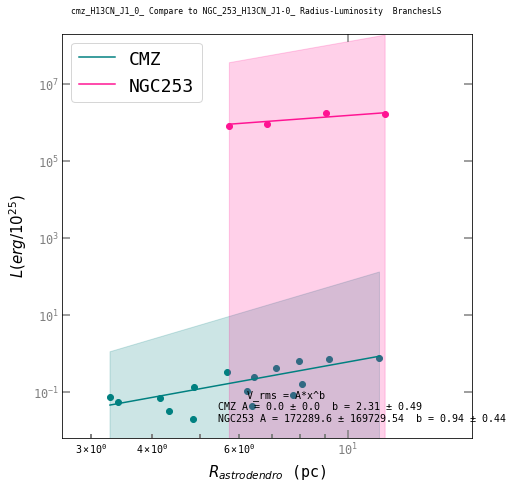

input data is of type linear fitting to powerlaw...
8.061749043027628 0.9458401152553962 4.518215127402175 0.02620902373895684
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.2777726371114673 0.1019393689306435
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.2777726371114673, 0.07816972380722358] [0.1019393689306435, 0.004474842183016508] 3.3018735388143865 0.006419340917488994
[[1.19594889 0.41494756]
 [1.19594889 0.41494756]
 [1.19594889 0.41494756]
 ...
 [1.59585472 0.21632978]
 [1.59585472 0.21632978]
 [1.66868497 0.19361094]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J1-0_
    least sq  max like      MCMC
a   2.277773  3.301874  1.926480
a-  0.078170            0.054127
a+  0.078170            0.116832
c   0.101939  0.006419  0.121195
c-  0.004475            0.031323
c+  0.004475            0.016397



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.2777726371114673 0.2795884901193602 239.72427068377036 6.574130967329039 1.2645597922352334
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9264801921733088 0.23265256044375132 111.60284622364985 9.061972443632472 1.3218892733119536
Using Least Squares fit min r = 1

cmz_HCN_J1-0_ Compare to NGC_253_HCN_J1-0_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  0.1019393689306435  +-  0.06689426121138127 , b =  2.2777726371114673  +-  0.2795884901193602

Structures plotted:  31

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
12.539726141832455 79

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J1-0_
    least sq  max like      MCMC
a   1.829796  2.070476  2.000000
a-  0.028733            0.000000
a+  0.028733            0.000000
c 679688.405261355278.665902 10.000000
c-80947296957.308899            0.000000
c+80947296957.308899            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.8297961819493 0.16950795421738968 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999748812 4.364565121649964e-06 999999998581.6794 999999.9978492756 9999999986.395176
NGC253 fit params and covariance error: a =  679688.4052614794  +-  284512.3845411811 , b =  1.8297961819493  +-  0.16950795421738968

Structures plotted:  20



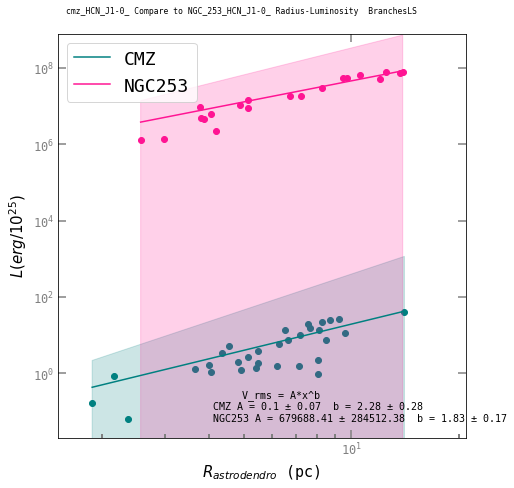

input data is of type linear fitting to powerlaw...
12.932496997718696 0.31813491293763985 5.692254881860875 0.0358670643952843
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.6535243067982306 0.004935720378289169
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.6535243067982306, 0.034764185759475] [0.004935720378289169, 4.728712649529501e-06] 1.8966014054241782 0.0027903935305720502
[[-0.33366747  0.40944462]
 [-0.33366747  0.40944462]
 [-0.33366747  0.40944462]
 ...
 [-1.81600603  3.36601499]
 [-1.81676805  4.70180063]
 [-1.67401434  2.85885869]]
plotting walkers ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13COp_J1_0_
    least sq  max like      MCMC
a   1.653524  1.896601 -1.356933
a-  0.034764            0.734638
a+  0.034764            0.448889
c   0.004936  0.002790  0.063507
c-  0.000005            4.955194
c+  0.000005            4.919285



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.6535243067982306 0.1864515641110983 45.54702623765813 1.9094306559122995 1.011429742173923
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.3569328048509077 0.8571100429779774 0.05088312498188348 0.0004668743429709943 1.1574615699003568
Using Least Squares fit min r = 1

cmz_H13COp_J1_0_ Compare to NGC_253_H13CO+_J1-0_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  0.004935720378289169  +-  0.002174560334764134 , b =  1.6535243067982306  +-  0.1864515641110983

Structures plotted:  9

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
8.9954

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CO+_J1-0_
    least sq  max like      MCMC
a   1.674184  2.017342  2.000000
a-  0.102645            0.000000
a+  0.102645            0.000000
c 21176.5269749153.501257 10.000000
c-232131973.555558            0.000000
c+232131973.555558            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.6741836291781929 0.3203819691761149 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999978544525 4.032977736029012e-05 999999881903.2 999999.828041516 9999998868.435051
NGC253 fit params and covariance error: a =  21176.526974279244  +-  15235.8778400051 , b =  1.6741836291781929  +-  0.3203819691761149

Structures plotted:  8



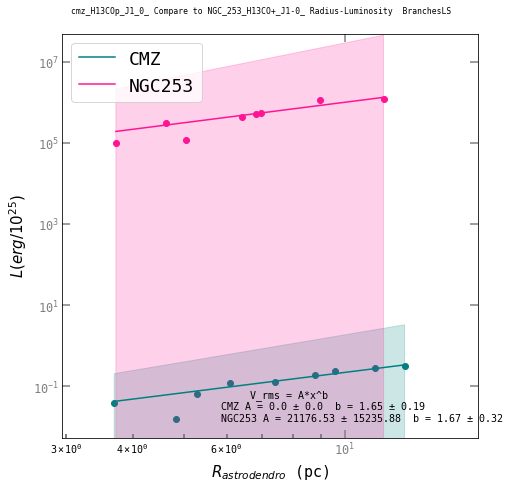

input data is of type linear fitting to powerlaw...
9.635270458584806 5.337154252666044 4.646759832183447 0.007394452106944356
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.7208715883215742 0.23344724092908403
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.7208715883215742, 0.06902653269072538] [0.23344724092908403, 0.02563879516087693] 2.4822554360076614 0.026930832039698295
[[1.08966844 0.71367681]
 [1.18875092 0.62487036]
 [1.22769069 0.54836424]
 ...
 [1.70800654 0.21198776]
 [1.71175185 0.19487928]
 [1.7612064  0.16812316]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_3mm_HCO+_J1-0_
    least sq  max like      MCMC
a   1.720872  2.482255  1.878095
a-  0.069027            0.089118
a+  0.069027            0.167063
c   0.233447  0.026931  0.118510
c-  0.025639            0.054904
c+  0.025639            0.025087



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.7208715883215742 0.262729009990761 90.01581734716198 3.906675493201209 1.7117772135234384
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.878094552332457 0.2985266746726112 99.22112160614735 7.984126674823061 1.3137404732456308
Using Least Squares fit min r = 1

cmz_3mm_HCO+_J1-0_ Compare to NGC_253_HCO+_J1-0_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  0.23344724092908403  +-  0.16012118898158648 , b =  1.7208715883215742  +-  0.262729009990761

Structures plotted:  13

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
4.6516863703809

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J1-0_
    least sq  max like      MCMC
a   1.909403  2.003885  2.000000
a-  0.046193            0.000000
a+  0.046193            0.000000
c 482480.519153360399.154466 10.000000
c-62612624026.923454            0.000000
c+62612624026.923454            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9094034454015418 0.214926436069196 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999999982288 3.667472146224668e-06 999999999033.7487 999999.9985348711 9999999990.745321
NGC253 fit params and covariance error: a =  482480.519152571  +-  250225.14667179927 , b =  1.9094034454015418  +-  0.214926436069196

Structures plotted:  21



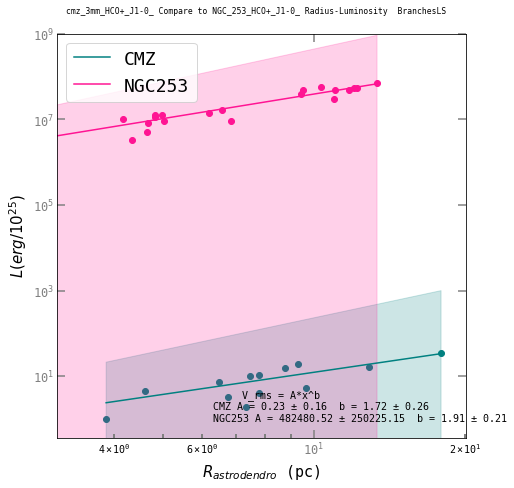

input data is of type linear fitting to powerlaw...
10.157374562991064 2.508299231912441 1.6889795489823505 0.01496503758005658
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.0648132071455483 0.25326586893401437
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.0648132071455483, 0.038871552132170556] [0.25326586893401437, 0.01636918945558071] 2.583046734266561 0.030672075319102578
[[1.39630994 0.55874874]
 [1.40000215 0.55536827]
 [1.40000215 0.55536827]
 ...
 [1.99653757 0.12474605]
 [1.99533588 0.12489621]
 [1.99655427 0.12463417]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J3_2__
    least sq  max like      MCMC
a   2.064813  2.583047  1.998296
a-  0.038872            0.001282
a+  0.038872            0.002867
c   0.253266  0.030672  0.124636
c-  0.016369            0.001804
c+  0.016369            0.001729



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.0648132071455483 0.1971586978354507 208.00753915089422 4.494570442319126 1.791702373194098
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9982959337042827 0.03580411614867526 132.7185697838616 11.459558108994699 1.3324034828410183
Using Least Squares fit min r = 0.8

cmz_CO_J3_2__ Compare to NGC_253_CO_J3-2_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  0.25326586893401437  +-  0.1279421332305379 , b =  2.0648132071455483  +-  0.1971586978354507

Structures plotted:  325

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
5.45990144039745 167

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J3-2_
    least sq  max like      MCMC
a   2.962509  3.433125  2.000000
a-  0.064673            0.000000
a+  0.064673            0.000000
c 59277.47413415350.036291 10.000000
c-1432021257.841172            0.000000
c+1432021257.841172            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.9625091819505127 0.2543094928740589 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999972458 1.4418750417123766e-06 999999999843.216 999999.9997821379 9999999998.495579
NGC253 fit params and covariance error: a =  59277.47413403456  +-  37842.05673376081 , b =  2.9625091819505127  +-  0.2543094928740589

Structures plotted:  119



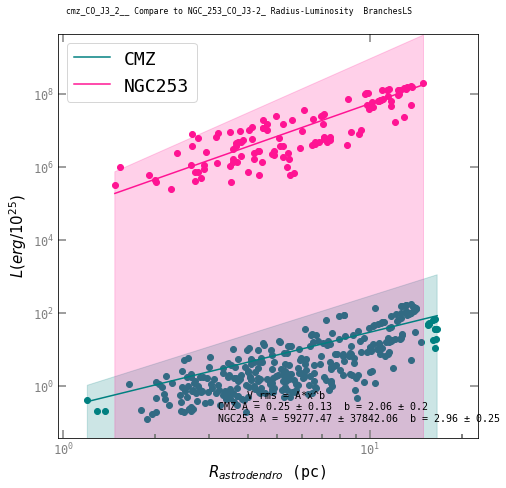

input data is of type linear fitting to powerlaw...
20.268080860021986 0.08701404786911576 3.394682536217032 0.2329549831853796
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.8260664445211887 0.0002645499903185036
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.8260664445211887, 0.22571854986933515] [0.0002645499903185036, 2.81703139717603e-07] 1.8479846548751815 0.0014023265111281012
[[ 0.34383419  0.37643513]
 [ 0.51569889  0.19150338]
 [ 0.51569889  0.19150338]
 ...
 [-0.47806754  4.26945157]
 [-0.47806754  4.26945157]
 [-0.47806754  4.26945157]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J1_0_
    least sq  max like      MCMC
a   2.826066  1.847985  1.034214
a-  0.225719            0.429373
a+  0.225719            0.536970
c   0.000265  0.001402  0.031369
c-  0.000000            0.169183
c+  0.000000            0.025193



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.8260664445211887 0.4750984633413743 670.3953519058886 18.66624523945883 1.0006093344329061
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.03421362692937 0.6552653168087289 11.63008749559051 1.7852968408994174 1.0749031982978143
Using Least Squares fit min r = 9.5

cmz_CO_J1_0_ Compare to NGC_253_CO_J1-0_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  0.0002645499903185036  +-  0.0005307571381692412 , b =  2.8260664445211887  +-  0.4750984633413743

Structures plotted:  65

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
37.06946292142592 187

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J1-0_
    least sq  max like      MCMC
a   1.756914  2.808224  2.000000
a-  0.007258            0.000000
a+  0.007258            0.000000
c 25877.831064160.473886 10.000000
c-112866237.045351            0.000000
c+112866237.045351            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.7569138691458355 0.08519626031956845 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999999999918 2.484520077784816e-07 999999999990.9314 999999.9999853765 9999999999.911201
NGC253 fit params and covariance error: a =  25877.83106440581  +-  10623.852269556033 , b =  1.7569138691458355  +-  0.08519626031956845

Structures plotted:  79



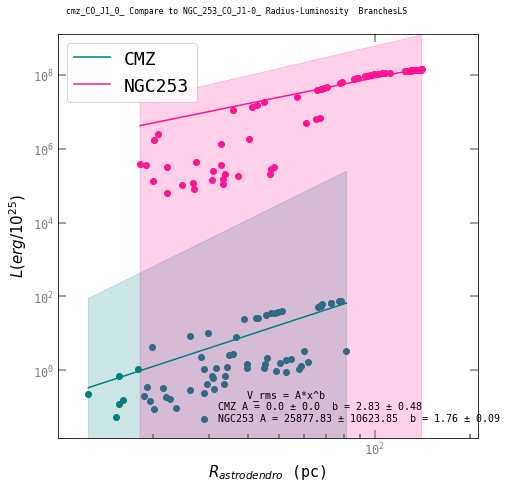

input data is of type linear fitting to powerlaw...
8.62121387031873 0.48437227751760986 3.466552343623383 0.023329519599835473
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.1948928948578956 0.0038761533315016827
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.1948928948578956, 0.33666680235193325] [0.0038761533315016827, 2.115357204080211e-05] 2.0403968731676745 0.004952420487476763
[[-0.44340179 -2.0278918 ]
 [-0.66006647  0.68885531]
 [-0.30224849  0.96269116]
 ...
 [-0.98926683 -4.97231547]
 [-0.85587095 -6.94754398]
 [-0.91606245 -5.73066393]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_SiO_J2_1_
    least sq  max like      MCMC
a   2.194893  2.040397 -1.299501
a-  0.336667            0.737473
a+  0.336667            0.487423
c   0.003876  0.004952  0.244025
c-  0.000021            5.235271
c+  0.000021            5.070147



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.1948928948578956 0.580229956441352 158.04073769363066 11.068595484826385 1.008965120994234
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.2995011971774408 0.8587622843605278 0.08800843238626123 0.0004937160761774671 1.7539834150879638
Using Least Squares fit min r = 1

cmz_SiO_J2_1_ Compare to NGC_253_SiO_J2-1_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  0.0038761533315016827  +-  0.004599301255712884 , b =  2.1948928948578956  +-  0.580229956441352

Structures plotted:  5

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
8.5549355556802

mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_SiO_J2-1_
    least sq  max like      MCMC
a   3.014565  3.373933  2.000000
a-  0.122234            0.000000
a+  0.122234            0.000000
c 1556.704343732.738513 10.000000
c-1262482.597787            0.000000
c+1262482.597787            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 3.0145645799845058 0.349619700283915 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999936369126 6.950479519915092e-05 999999704279.9922 999999.5602005096 9999997189.315382
NGC253 fit params and covariance error: a =  1556.7043430203455  +-  1123.6025088024821 , b =  3.0145645799845058  +-  0.349619700283915

Structures plotted:  4



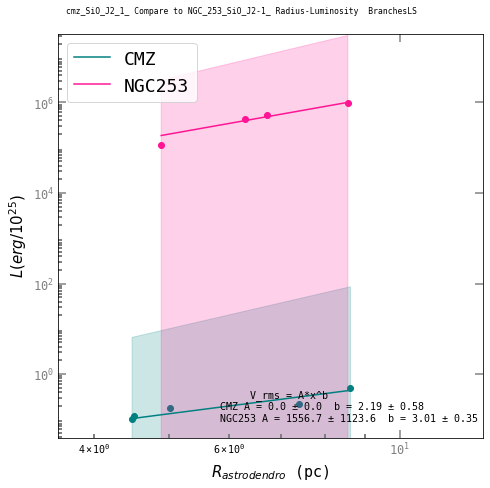

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_H13CN_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
7.724598111313055 0.08322325129661186 4.748336844220261 0.025805452356985528
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.3078822142579924 0.00292768311923492
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.3078822142579924, 0.2373293631524872] [0.00292768311923492, 1.0133161614990141e-05] 2.834063625996427 0.0007986423120984929
[[ 0.3285873   0.17567694]
 [ 0.3285873   0.17567694]
 [ 0.3285873   0.17567694]
 ...
 [-1.31569086 -7.30700943]
 [-1.31569086 -7.30700943]
 [-1.32319393 -7.2721542 ]]
plotting walkers ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   2.307882  2.834064 -1.383282
a-  0.237329            0.710200
a+  0.237329            0.434420
c   0.002928  0.000799  0.385979
c-  0.000010            4.969935
c+  0.000010            4.629172



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.3078822142579924 0.48716461607190564 204.55490477271428 10.57276380411427 1.0067640128070705
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.3832816559771555 0.8427334080822225 0.1006230359385637 0.0009322938509543048 2.432086810097424
Using Least Squares fit min r = 1

NOT AVAILABLE Compare to NGC_253_H13CN_J4-3_ Radius-Luminosity  BranchesLS

NGC_253_H13CN_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.5106115281142545 1245926.9774365372 7.716779361685146 0.011902022278586314
masking bad values ...
restricting fit to [None, Non

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J4-3_
    least sq  max like      MCMC
a  -2.188726 -2.188726  2.000000
a-       inf            0.000000
a+       inf            0.000000
c 9343306.7534619343306.753461  9.999999
c-       inf            0.000001
c+       inf            0.000003



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -2.1887264784923275 inf inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999998761096685 0.0003052919143594067 999996295739.4746 999994.7538176693 9999965810.064892
NGC253 fit params and covariance error: a =  9343306.753461218  +-  inf , b =  -2.1887264784923275  +-  inf

Structures plotted:  2



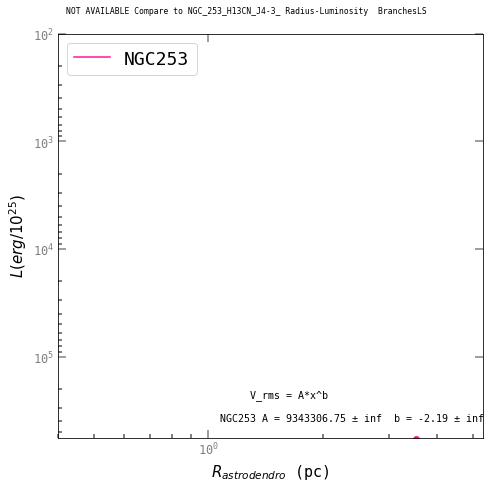

input data is of type linear fitting to powerlaw...
4.373498376264024 0.12532667027999292 1.5588766882379388 0.022871040416542275
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.0821506799357454 0.06669897714222243
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.0821506799357454, 0.01432909092210466] [0.06669897714222243, 0.00030471916337948253] 2.74686515046459 0.013965611533950617
[[1.16907868 0.25805722]
 [1.23053511 0.23938588]
 [1.21475733 0.24803288]
 ...
 [1.95714561 0.05464503]
 [1.95714561 0.05464503]
 [1.81203943 0.08309808]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J4_3_
    least sq  max like      MCMC
a   2.082151  2.746865  1.662752
a-  0.014329            0.242711
a+  0.014329            0.422965
c   0.066699  0.013966  0.111273
c-  0.000305            0.107094
c+  0.000305            0.041332



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.0821506799357454 0.1197041808881572 140.88010189644808 2.156210127608044 1.166001145662411
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.6627516775757316 0.4926569899570131 59.432584055868226 4.51713860456855 1.2920310052716042
Using Least Squares fit min r = 1

cmz_HCN_J4_3_ Compare to NGC_253_HCN_J4-3_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  0.06669897714222243  +-  0.01745620701582914 , b =  2.0821506799357454  +-  0.1197041808881572

Structures plotted:  70

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
8.966983953764524 11526

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J4-3_
    least sq  max like      MCMC
a   2.201396  2.116694  2.000000
a-  0.061393            0.000000
a+  0.061393            0.000000
c 123894.887356145482.431831 10.000000
c-5194547546.814991            0.000000
c+5194547546.814991            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.2013958083893823 0.24777612040232816 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999999854842 1.0450208886555742e-05 999999992248.7042 999999.9881600612 9999999925.829432
NGC253 fit params and covariance error: a =  123894.88735584707  +-  72073.2096330876 , b =  2.2013958083893823  +-  0.24777612040232816

Structures plotted:  16



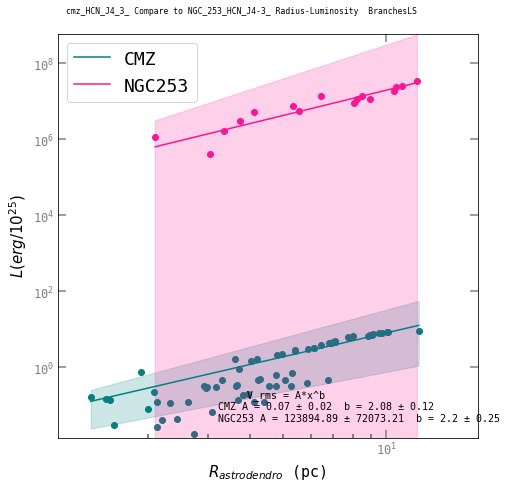

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_HCO+_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
7.724598111313055 0.08322325129661186 4.748336844220261 0.025805452356985528
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.3078822142579924 0.00292768311923492
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.3078822142579924, 0.2373293631524872] [0.00292768311923492, 1.0133161614990141e-05] 2.834063625996427 0.0007986423120984929
[[-1.88607561  0.05775879]
 [-1.88233695  0.06696218]
 [-1.88233695  0.06696218]
 ...
 [-0.85511883  1.9034347 ]
 [-0.85511883  1.9034347 ]
 [-0.85511883  1.9034347 ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   2.307882  2.834064 -1.388384
a-  0.237329            0.715452
a+  0.237329            0.432290
c   0.002928  0.000799  0.376840
c-  0.000010            4.950875
c+  0.000010            4.656615



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.3078822142579924 0.48716461607190564 204.55490477271428 10.57276380411427 1.0067640128070705
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -1.3883837613572942 0.8458436776658621 0.09737701790501342 0.0008907910288374391 2.3814432233859133
Using Least Squares fit min r = 0.9

NOT AVAILABLE Compare to NGC_253_HCO+_J4-3_ Radius-Luminosity  BranchesLS

NGC_253_HCO+_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
12.076194157836447 36192146.27765992 11.543670974087746 0.003403535932104292
masking bad values ...
restricting fit to [None, N

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J4-3_
    least sq  max like      MCMC
a   2.216427  2.195378  2.000000
a-  0.041256            0.000000
a+  0.041256            0.000000
c 134895.356982135183.204884 10.000000
c-4092995984.640818            0.000000
c+4092995984.640818            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.2164268279007864 0.20311537711709446 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999998868745 9.163499335192828e-06 999999993867.6708 999999.9907551334 9999999941.281519
NGC253 fit params and covariance error: a =  134895.35698248056  +-  63976.526825397596 , b =  2.2164268279007864  +-  0.20311537711709446

Structures plotted:  16



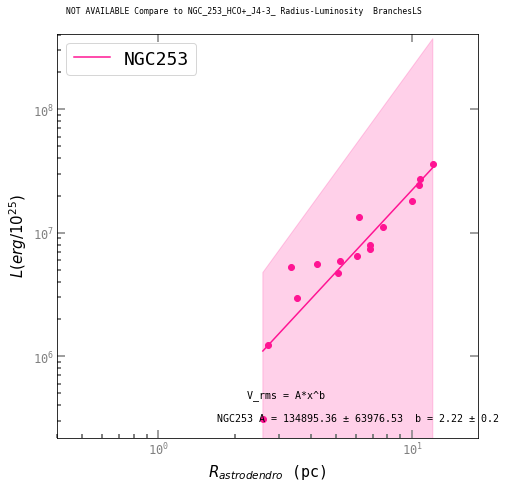

In [11]:
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="Branches",save_name="LS",fs=8,plot_errors=False)
with open("Result Files/LS fit results CD", 'wb') as file:
    pickle.dump([fit_results_cmz,fit_results_ngc], file) #save the fit resutls as form [[cmzall[vars,covars],leaves[vars,covars],branches[vars,covars]], [same for ngc]]


# Side by side plots

# Compare fit results for all lines

average parameters for LS fit results RL :
a_cmz = 28.44728248727046 +- 5.3176622377375455
b_cmz = 2.399041369470029 +- 0.06834885230501703
a_ngc = 240.12623052696682 +- 65.35633797456681
b_ngc = 2.0736126365618963 +- 0.10217702511986826


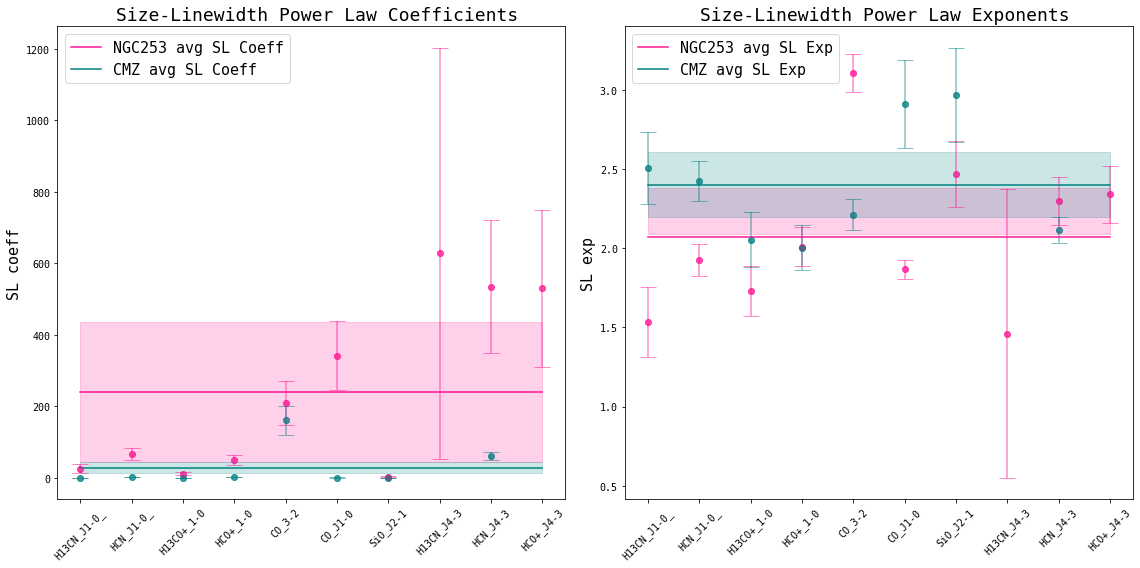

In [58]:
#
#All structures
#
#
#Compare fits for molecules


#with open("Result Files/MCMC fit results RL", 'rb') as file:
#    save_name="MCMC fit results RL"
#    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
with open("Result Files/LS fit results CD", 'rb') as file:
    save_name="LS fit results CD"
    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
    
Line_Names = ["H13CN_J1-0_","HCN_J1-0_",'H13CO+_1-0',"HCO+_1-0","CO_3-2","CO_J1-0","SiO_J2-1","H13CN_J4-3","HCN_J4-3","HCO+_J4-3"]
CMZ_has_line=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,0           ,1         ,0]#1=yess 0=no
CMZ_has_line_n=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,np.nan           ,1         ,np.nan]#1=yess 0=no

mean_c=0
mean_e=0
er_r=3
fig = plt.figure(1,figsize=(16,8))
axA = pylab.subplot(1,2, 1)
axA2 = pylab.subplot(1,2, 2)

#for l in range(len(fit_results_ngc)):
fit_results_ngc = fit_results_ngc[0:len(Line_Names)]#all structures
fit_results_cmz = fit_results_cmz[0:len(Line_Names)]#all structures
#fit_results_ngc = fit_results_ngc[len(Line_Names):len(Line_Names)*2]#leaves
#fit_results_cmz = fit_results_cmz[len(Line_Names):len(Line_Names)*2]#leaves
#fit_results_ngc = fit_results_ngc[len(Line_Names)*2:]#branches
#fit_results_cmz = fit_results_cmz[len(Line_Names)*2:]#branches
c1,c2,c3,c4=[],[],[],[]#for clarity, use these to store the values
n1,n2,n3,n4=[],[],[],[]#for clarity, use these to store the values
#for l in range(len(fit_results_ngc[0])):
for l in range(10):
    #num = len(fit_results_ngc[0])
    num = 10
    spacing =1 # /num +1
    #load the restults
    ngc_coeff,ngc_exp,ngc_coeff_err,ngc_exp_err = fit_results_ngc[0][l][0],fit_results_ngc[0][l][1],np.sqrt(fit_results_ngc[1][l][0][0]),np.sqrt(fit_results_ngc[1][l][1][1])
    cmz_coeff,cmz_exp,cmz_coeff_err,cmz_exp_err = fit_results_cmz[0][l][0],fit_results_cmz[0][l][1],np.sqrt(fit_results_cmz[1][l][0][0]),np.sqrt(fit_results_cmz[1][l][1][1])
    if CMZ_has_line[l]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=np.nan,np.nan,np.nan,np.nan

    #plots exp
    axA2.scatter(spacing*l,ngc_exp,color='orange',alpha=.5)
    axA2.errorbar(spacing*l,ngc_exp, yerr= ngc_exp_err, fmt="o",capsize=8,color='orange',alpha=.5)
    axA2.scatter(spacing*l,cmz_exp,color='black',alpha=.5)
    axA2.errorbar(spacing*l,cmz_exp, yerr= cmz_exp_err, fmt="o",capsize=8,color='black',alpha=.5)
    #plots coeff
    axA.scatter(spacing*l,ngc_coeff,color='orange',alpha=.5)
    axA.errorbar(spacing*l,ngc_coeff, yerr= ngc_coeff_err, fmt="o",capsize=8,color='orange',alpha=.5)
    axA.scatter(spacing*l,cmz_coeff,color='black',alpha=.5)
    axA.errorbar(spacing*l,cmz_coeff, yerr= cmz_coeff_err, fmt="o",capsize=8,color='black',alpha=.5)
    
    if CMZ_has_line[l]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=0,0,0,0 #set to zero for simplicifty
    c1.append(cmz_coeff), c2.append(cmz_exp), c3.append(cmz_coeff_err), c4.append(cmz_exp_err)
    n1.append(ngc_coeff), n2.append(ngc_exp), n3.append(ngc_coeff_err), n4.append(ngc_exp_err)
#    
#make averages
avg_cmz_coeff = np.dot(c1,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_cmz_exp = np.dot(c2,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_ngc_coeff = np.mean(n1)
avg_ngc_exp = np.mean(n2)
#########
#propagate errors to mean (sum square; take square root, divide by n)
avg_cmz_coeff_err = np.sqrt(np.sum(err**2 for err in np.array(c3)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_cmz_exp_err = np.sqrt(np.sum(err**2 for err in np.array(c4)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_ngc_coeff_err = np.sqrt(np.sum(err**2 for err in n3))/len(Line_Names)#
avg_ngc_exp_err = np.sqrt(np.sum(err**2 for err in n4))/len(Line_Names)#


#n = range(len(fit_results_ngc))#0 to 9
n = range(10)#0 to 9
err_r = 3 #the sigma to plot
axA.plot(n,np.full(len(n),avg_ngc_coeff),color="orange",label="NGC253 avg SL Coeff")
axA.plot(n,np.full(len(n),avg_cmz_coeff),color="black",label="CMZ avg SL Coeff")
axA2.plot(n,np.full(len(n),avg_ngc_exp),color="orange",label="NGC253 avg SL Exp")
axA2.plot(n,np.full(len(n),avg_cmz_exp),color="black",label="CMZ avg SL Exp")

axA.fill_between(n,np.full(len(n),avg_ngc_coeff+err_r*avg_ngc_coeff_err),np.full(len(n),avg_ngc_coeff-er_r*avg_ngc_coeff_err),color="orange",alpha=.2)
axA.fill_between(n,np.full(len(n),avg_cmz_coeff+err_r*avg_cmz_coeff_err),np.full(len(n),avg_cmz_coeff-er_r*avg_cmz_coeff_err),color="black",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_ngc_exp+err_r*avg_ngc_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_ngc_exp_err),color="orange",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_cmz_exp+err_r*avg_cmz_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_cmz_exp_err),color="black",alpha=.2)

print("average parameters for",save_name,":")
print("a_cmz =",avg_cmz_coeff,"+-",avg_cmz_coeff_err)
print("b_cmz =",avg_cmz_exp,"+-",avg_cmz_exp_err)
print("a_ngc =",avg_ngc_coeff,"+-",avg_ngc_coeff_err)
print("b_ngc =",avg_ngc_exp,"+-",avg_ngc_exp_err)
#set line labels
axA.set_xticks(n)
axA.set_xticklabels(Line_Names, rotation=45)
axA2.set_xticks(n)
axA2.set_xticklabels(Line_Names, rotation=45)


axA.set_ylabel('SL coeff',fontsize=15)
axA2.set_ylabel('SL exp',fontsize=15)


axA.set_title(" Size-Linewidth Power Law Coefficients", fontsize=18)
axA2.set_title(" Size-Linewidth Power Law Exponents", fontsize=18)

axA.legend(loc='upper left',fontsize=15,)
axA2.legend(loc='upper left',fontsize=15,)


plt.tight_layout()  # avoids label cutoff


fig.savefig(bbox_inches='tight',fname=save_name+" all lines.png")

pylab.show()

average parameters for LS fit results RL Leaves :
a_cmz = 25.800980118275042 +- 3.158041745232881
b_cmz = 1.6550812687196306 +- 0.15218893193233016
a_ngc = 514.7647920597631 +- 149.40160769920084
b_ngc = 1.8447133738676853 +- 0.1821308188838792


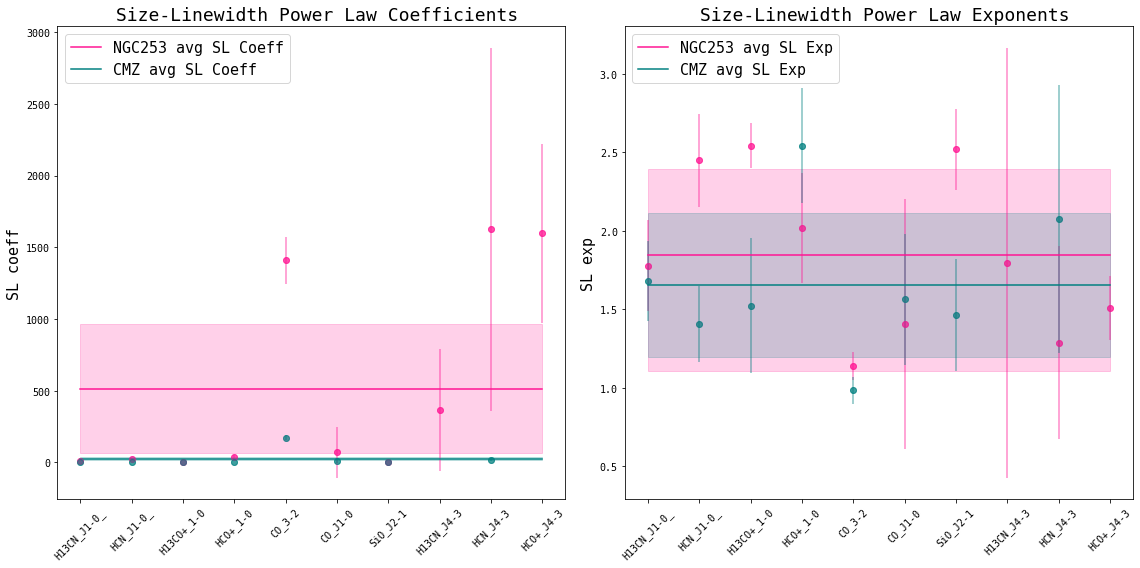

In [59]:
#
#Leaves
#
#
#Compare fits for molecules


#with open("Result Files/MCMC fit results RL", 'rb') as file:
#    save_name="MCMC fit results RL"
#    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
with open("Result Files/LS fit results CD", 'rb') as file:
    save_name="LS fit results CD"
    fit_results_cmz,fit_results_ngc = pickle.load(file)

    
Line_Names = ["H13CN_J1-0_","HCN_J1-0_",'H13CO+_1-0',"HCO+_1-0","CO_3-2","CO_J1-0","SiO_J2-1","H13CN_J4-3","HCN_J4-3","HCO+_J4-3"]
CMZ_has_line=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,0           ,1         ,0]#1=yess 0=no

mean_c=0
mean_e=0

fig = plt.figure(1,figsize=(16,8))
axA = pylab.subplot(1,2, 1)
axA2 = pylab.subplot(1,2, 2)


c1,c2,c3,c4=[],[],[],[]#for clarity, use these to store the values
n1,n2,n3,n4=[],[],[],[]#for clarity, use these to store the values
save_name+=" Leaves"
r=(10,20)
lmo=0
for l in range(r[0],r[1]):
    #num = len(fit_results_ngc[0])
    num = 10
    spacing =1 # /num +1
    #load the restults
    ngc_coeff,ngc_exp,ngc_coeff_err,ngc_exp_err = fit_results_ngc[0][l][0],fit_results_ngc[0][l][1],np.sqrt(fit_results_ngc[1][l][0][0]),np.sqrt(fit_results_ngc[1][l][1][1])
    cmz_coeff,cmz_exp,cmz_coeff_err,cmz_exp_err = fit_results_cmz[0][l][0],fit_results_cmz[0][l][1],np.sqrt(fit_results_cmz[1][l][0][0]),np.sqrt(fit_results_cmz[1][l][1][1])
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=np.nan,np.nan,np.nan,np.nan

    #plots exp
    axA2.scatter(spacing*l,ngc_exp,color='orange',alpha=.5)
    axA2.errorbar(spacing*l,ngc_exp, yerr= ngc_exp_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA2.scatter(spacing*l,cmz_exp,color='black',alpha=.5)
    axA2.errorbar(spacing*l,cmz_exp, yerr= cmz_exp_err, fmt="o",capsize=0,color='black',alpha=.5)
    #plots coeff
    axA.scatter(spacing*l,ngc_coeff,color='orange',alpha=.5)
    axA.errorbar(spacing*l,ngc_coeff, yerr= ngc_coeff_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA.scatter(spacing*l,cmz_coeff,color='black',alpha=.5)
    axA.errorbar(spacing*l,cmz_coeff, yerr= cmz_coeff_err, fmt="o",capsize=0,color='black',alpha=.5)
    
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=0,0,0,0 #set to zero for simplicifty
    c1.append(cmz_coeff), c2.append(cmz_exp), c3.append(cmz_coeff_err), c4.append(cmz_exp_err)
    n1.append(ngc_coeff), n2.append(ngc_exp), n3.append(ngc_coeff_err), n4.append(ngc_exp_err)
    lmo+=1
#    
#make averages
avg_cmz_coeff = np.dot(c1,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_cmz_exp = np.dot(c2,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_ngc_coeff = np.mean(n1)
avg_ngc_exp = np.mean(n2)
#propagate errors to mean (sum square; take square root, divide by n)
avg_cmz_coeff_err = np.sqrt(np.sum(err**2 for err in np.array(c3)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_cmz_exp_err = np.sqrt(np.sum(err**2 for err in np.array(c4)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_ngc_coeff_err = np.sqrt(np.sum(err**2 for err in n3))/len(Line_Names)#
avg_ngc_exp_err = np.sqrt(np.sum(err**2 for err in n4))/len(Line_Names)#


#n = range(len(fit_results_ngc))#0 to 9
n = range(r[0],r[1])
err_r = 3 #the sigma to plot
axA.plot(n,np.full(len(n),avg_ngc_coeff),color="orange",label="NGC253 avg SL Coeff")
axA.plot(n,np.full(len(n),avg_cmz_coeff),color="black",label="CMZ avg SL Coeff")
axA2.plot(n,np.full(len(n),avg_ngc_exp),color="orange",label="NGC253 avg SL Exp")
axA2.plot(n,np.full(len(n),avg_cmz_exp),color="black",label="CMZ avg SL Exp")

axA.fill_between(n,np.full(len(n),avg_ngc_coeff+err_r*avg_ngc_coeff_err),np.full(len(n),avg_ngc_coeff-er_r*avg_ngc_coeff_err),color="orange",alpha=.2)
axA.fill_between(n,np.full(len(n),avg_cmz_coeff+err_r*avg_cmz_coeff_err),np.full(len(n),avg_cmz_coeff-er_r*avg_cmz_coeff_err),color="black",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_ngc_exp+err_r*avg_ngc_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_ngc_exp_err),color="orange",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_cmz_exp+err_r*avg_cmz_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_cmz_exp_err),color="black",alpha=.2)
print("average parameters for",save_name,":")
print("a_cmz =",avg_cmz_coeff,"+-",avg_cmz_coeff_err)
print("b_cmz =",avg_cmz_exp,"+-",avg_cmz_exp_err)
print("a_ngc =",avg_ngc_coeff,"+-",avg_ngc_coeff_err)
print("b_ngc =",avg_ngc_exp,"+-",avg_ngc_exp_err)

#set line labels
axA.set_xticks(n)
axA.set_xticklabels(Line_Names, rotation=45)
axA2.set_xticks(n)
axA2.set_xticklabels(Line_Names, rotation=45)


axA.set_ylabel('SL coeff',fontsize=15)
axA2.set_ylabel('SL exp',fontsize=15)


axA.set_title(" Size-Linewidth Power Law Coefficients", fontsize=18)
axA2.set_title(" Size-Linewidth Power Law Exponents", fontsize=18)

axA.legend(loc='upper left',fontsize=15,)
axA2.legend(loc='upper left',fontsize=15,)


plt.tight_layout()  # avoids label cutoff


fig.savefig(bbox_inches='tight',fname=save_name+" all lines.png")

pylab.show()